In [86]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import gridspec
import copy
import os
from tqdm import tqdm 

from EightBitTransit.cTransitingImage import TransitingImage
from EightBitTransit.inversion import *
from EightBitTransit.misc import *
from scipy.optimize import lsq_linear
import tqdm as tqdm

%matplotlib inline


import matplotlib.path as mpath
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from matplotlib.patches import Wedge


from PIL import Image 


# Add spocc directory to the path to import spocc modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import data
import loaders


# These "magic" functions work in jupyter notebooks, this one reloads
# modules so if you make changes, you don't have to restart the notebook.
%load_ext autoreload
%autoreload 2

from extern import features

import gc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys
from sklearn.neighbors import NearestNeighbors
from multiprocessing import Pool
sys.path.append('..')
import loaders
import data
from extern.quarterTools import data_scaler

import warnings
from lightkurve import LightkurveWarning
warnings.filterwarnings("ignore", category=LightkurveWarning)



SEED = 12345
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#inject squares
#pick one lightcurve
#width/depth plot
#detected if rank < 80k and M > 0.25
#start with mag 14-15 bin

#right now change by hand shape, d/w, tic id




In [107]:
#round shapes


def make_shape(image_ratio, velocity, shape, t_ref):
    data_dir = './Random_LCs'
    image_ratio = image_ratio
    image_ratio_high = 1 + .5* (image_ratio -1)
    image_ratio_low = -.5 * (image_ratio-1)
    print(image_ratio_high, image_ratio_low)
    
    v = float(velocity)

    if shape == 'Circle':
        circle = plt.Circle((0.5, 0.5), 0.5, color='black')

        fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
        # (or if you have an existing figure)
        # fig = plt.gcf()
        # ax = fig.gca()

        ax.add_patch(circle)
        ax.set_aspect('equal', adjustable='box')

        plt.axis('off')
        plt.xlim(0,1)
        plt.ylim(image_ratio_low,image_ratio_high)
        
        os.makedirs(data_dir + "/Class_%s" %(shape), exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)
        fig.savefig(img_file_name ,bbox_inches='tight', pad_inches = 0)

    if shape == 'Triangle':
        pts = np.array([[0,0], [1,0], [.5,0.866025]],)
        p = Polygon(pts, closed=False, fc = 'black')
        ax = plt.gca()
        ax.add_patch(p)
        ax.set_aspect('equal', adjustable='box')
        plt.axis('off')
        plt.xlim(0,1)
        plt.ylim(image_ratio_low,image_ratio_high)

        os.makedirs(data_dir + "/Class_%s" %(shape), exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)
        plt.savefig(img_file_name ,bbox_inches='tight', pad_inches = 0)
    
    if shape == 'Square':
        plt.axes()
        square = plt.Rectangle((0,0),1,1, fc='black',ec="black")
        plt.gca().add_patch(square)
        plt.axis('scaled')

        plt.axis('off')
        plt.ylim(image_ratio_low,image_ratio_high)
        plt.xlim(0,1)


        #display plot
        plt.gcf()
        plt.savefig('square.png',bbox_inches='tight', pad_inches = 0)
        
        os.makedirs(data_dir + "/Class_%s" %(shape), exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)
        plt.savefig(img_file_name ,bbox_inches='tight', pad_inches = 0)

    
    if shape == 'Donut':
        outer_circle = plt.Circle((0.5, 0.5), 0.5, color='black')
        inner_circle = plt.Circle((0.25, 0.5), 0.2, facecolor='white', edgecolor='white')

        fig, ax = plt.subplots()
        ax.add_patch(outer_circle)
        ax.add_patch(inner_circle)
        ax.set_aspect('equal', adjustable='box')

        plt.axis('off')
        plt.xlim(0, 1)
        plt.ylim(image_ratio_low, image_ratio_high)
        plt.show()

        os.makedirs(data_dir + "/Class_%s" % shape, exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)

        fig.savefig(img_file_name, bbox_inches='tight', pad_inches=0, transparent =True)
        
    if shape == 'Panels':
        plt.axes()
        square = plt.Rectangle((0,0),6,1, fc='black',ec="black")
        inner_circle = plt.Circle((3, .25), .25, facecolor='white', edgecolor='white')

        plt.gca().add_patch(square)
        plt.gca().add_patch(inner_circle)

        plt.axis('scaled')

        plt.axis('off')
        plt.ylim(image_ratio_low,image_ratio_high)
        plt.xlim(0,6)


        #display plot
        plt.gcf()
        plt.savefig('square.png',bbox_inches='tight', pad_inches = 0)
        
        os.makedirs(data_dir + "/Class_%s" %(shape), exist_ok=True)
        img_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s.png" %(t_ref)
        plt.savefig(img_file_name ,bbox_inches='tight', pad_inches = 0)

    #######
    
    # Read back in the image file.

    # an array of times, in days, over which to calculate the light curve 
    times = np.linspace(0,27,1296)

    file = img_file_name

    lowres_SItitle = TransitingImage(imfile=file,
                                     lowres=50,
                                     lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                     lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                     v=velocity,
                                     t_ref=t_ref,
                                     t_arr=times,
                                     LDlaw = "linear",
                                     LDCs = [0.4]
                                    )
    ##plot lowres version of image
    lowres_SItitle.plot_grid()
    
    lowres_SItitle_LC, overlapTimes = lowres_SItitle.gen_LC(t_arr=times) 
    
    #plot lightcurve
    fig, ax = plt.subplots(1,1,figsize=(16,4))
    ax.plot(overlapTimes,lowres_SItitle_LC,color="#1969ea",ls="-",lw=5)
    #ax.set_xlim(-10,10)
    plt.xlabel("Time [days]",fontsize=14)
    plt.ylabel("Relative flux",fontsize=14)
    plt.title(r"The low-res image's light curve as it transits left-to-right across the star at $v = 0.3 d^{-1}$",fontsize=16)
    plt.show()
    
    print("min: " + str(min(lowres_SItitle_LC)))

    
    list_of_tuples = list(zip(overlapTimes, lowres_SItitle_LC))
    
    txt_file_name = data_dir + "/Class_%s" %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity) + "_t_%s" %(t_ref)
    
    df = pd.DataFrame(list_of_tuples, columns=['Time', 'Flux'])
    df.to_csv(txt_file_name + '.csv', index=False)
    
    #np.savetxt(txt_file_name, lowres_SItitle_LC, delimiter=",")


In [146]:
np.random.seed() #how do we want to add LCs to TESS curves?
import math

def make_lc(shape, image_ratio, velocity, index, t_ref):
    #shape = "Triangle"
    #ratio = "2"
    #index=3

    f0 = data_dir+subref.Filename.values[index]
    tic_id = f0.split('_')[-1].split('.')[0] #get the tic_id from the string
    lc = loaders.load_lc(f0)
    #print(lc)
    lc = lc[lc.quality==0]
    lc = lc.normalize()
    flux_err = lc.flux_err
    #print(f0)
    #print(flux_err[0])
    #print(lc.time.value)
    time = lc.time.value
    time = [value - time[0] for value in time] #make time start at 0
    # plt.scatter(time, lc.flux.value)
    # plt.title("TESS Flux Only")
    # plt.show()


    noise = pd.read_csv('/home/jupyter/SPOcc/spocc/notebooks/Random_LCs/Class_%s' %(shape) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity)+'_t_%s.csv' %(t_ref))

    sim_time = noise.iloc[:,0].values
    sim_flux = noise.iloc[:,1].values
    sim_flux = [x - 1 for x in sim_flux]


    #print(sim_time)
    # plt.scatter(sim_time, sim_flux)
    # plt.title("Flux From 8BT")
    # plt.show()
    #print(sim_time[-1])

    after_interval = math.ceil((27 - sim_time[-1]) / 0.0208333333) #days to 30 minutes

    sim_time_after = np.linspace(math.ceil(sim_time[-1]), 27, after_interval)
    #print(sim_time_after)

    sim_time = np.append(sim_time, sim_time_after)


    sim_flux_after = np.zeros(len(sim_time_after))

    sim_flux = np.append(sim_flux,sim_flux_after)

    before_interval = math.ceil((sim_time[0]) / 0.0208333333) #days to 30 minutes

    sim_time_before = np.linspace(0, math.floor(sim_time[0]), before_interval)
    #print(sim_time_before)

    sim_time = np.insert(sim_time, 0, sim_time_before)


    sim_flux_before = np.zeros(len(sim_time_before))

    sim_flux = np.insert(sim_flux, 0, sim_flux_before)    



#     plt.scatter(sim_time, sim_flux)
#     plt.title("Extended 8BT Flux")
#     plt.ylabel("Relative flux",fontsize=14)

#     plt.show()

    sim_flux = np.interp(time, sim_time, sim_flux) 
    #print(sim_flux)

    combined_flux = lc.flux.value + sim_flux

#     plt.scatter(time, sim_flux)
#     plt.title("Interpolated 8BT Flux")
#     plt.show()
    #plt.title("Combined 8BT & TESS Flux")
    plt.plot(time, combined_flux)
    #plt.xlabel("Time [days]",fontsize=14)
    plt.show()


    os.makedirs('./Injected_LCs_tic' + tic_id, exist_ok=True)
    print("tic " + tic_id)

    list_of_tuples = list(zip(time, combined_flux, flux_err))

    txt_file_name = './Injected_LCs_tic' + tic_id + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity)+'_t_%s' %(t_ref)

    df = pd.DataFrame(list_of_tuples, columns=['Time', 'Flux', 'Flux_err'])
    df.to_csv(txt_file_name + '.csv', index=False)

In [144]:
def calc_mstat(shape, image_ratio, velocity, t_ref):

    
    df = pd.read_csv('./Injected_LCs_tic' + str(tic_id) + "/%s" %(shape)  +"_ratio_%s" %(image_ratio) +"_velocity_%s" %(velocity)+'_t_%s.csv' %(t_ref))
    print(df)
    flux = df['Flux'].values
    
    avg = np.nanmedian(flux)
    # print('avg ' + str(avg))
    stdev = np.nanstd(flux)
    # print('stdev ' + str(stdev))

    orderflux = np.sort(flux)
    num = len(orderflux)
    # Get top and bottom deciles of the lightcurve data:
    extremeup = orderflux[0:int(np.round(0.1*num))]
    #print(len(extremeup), extremeup)
    extremedown = orderflux[int(np.round(0.9*num)):num-1]
    #print(len(extremedown), extremedown)    
    extreme = np.append(extremeup,extremedown)
    #print(len(extreme), extreme)
    
    #print(avg, np.mean(extreme), stdev)
    diff = (avg-np.mean(extreme))/stdev
    return diff

def plot_mstat_depth(shape, tic_id):
    mstats = np.array([])
    depths = np.array([])
    df_save2 = pd.DataFrame()
    df_save = pd.DataFrame()   

    if shape == 'Triangle':
        image_ratios = np.array([0.07, 0.16, 0.25, 0.34, 0.43, .49]) # triangles
    else:
        image_ratios = np.array([0.07, 0.16, 0.25, 0.34, 0.43, 0.52, 0.61, 0.70, 0.79, 0.88, 0.97, .99])


    #image_ratios = image_ratios + .02
    iteration = 0

    df_save = pd.DataFrame()

    #for vertices in range(3,4):
    #for ratio in range(1,11):
    for image_ratio in image_ratios:
    #for ratio in (1,1.2,1.4,1.6,1.8,2): #>=1
        if shape == 'Triangle':
            ratio = 1/ np.sqrt(1- 2*image_ratio) #triangle
        else:
            ratio = 1/ np.sqrt(1- image_ratio) #circ/square
        iteration +=1


        print("ratio " + str(image_ratio))
        df = pd.read_csv(#'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(shape) + '/' +str(shape) + '_ratio_'+ str(ratio)+'_velocity_0.6.csv'
                        '/home/jupyter/SPOcc/spocc/notebooks/Injected_LCs_tic' + tic_id + '/' +str(shape) + '_ratio_'+ str(ratio)+'_velocity_' + str(velocity)+ '.csv'
                         #'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(vertices) + '/ratio_'+ str(ratio)+ '.csv'
                        )
        flux = df['Flux'].values
        time = df['Time'].values

        df_save['Flux' + str(iteration)] = flux


        plt.ylim(0,1.1)

        plt.plot(time, flux, label='ratio' + str(ratio), color='grey')

        #plt.legend(loc='upper left')

        mstat = calc_mstat(flux)
        mstats = np.append(mstats, mstat)

        depth = np.min(flux[:-200])
        print('min ' +str(depth))
        depths = np.append(depths, depth)
        print("mstat: " + str(mstat) +"\n")
        #plt.show()

    #print(mstats)    

    #print('flux = flux[800:930] time = time[800:930]')
    #plt.plot(lc.time.value- lc.time.value[0], lc.flux.value, color = 'black')
    plt.title(str(shape) + 's', fontsize = 14)    
    plt.xlabel('Time [d]', fontsize = 14)
    plt.ylabel('Normalized Flux', fontsize = 14)
    plt.ylim(0,1.1)
    plt.show()
    plt.xlabel('Minimum Normalized Flux Stat', fontsize = 14)
    plt.ylabel('M', fontsize = 14)
    #plt.title(shape, fontsize = 14)
    plt.scatter(depths, mstats, color = 'black')
    plt.show()


    #list_of_tuples = list(zip(time, flux, depths, mstats))
    df_save['Time'] = time
    #df_save2[['Depths', 'Mstats']] = depths, mstats
    df_save2 = pd.DataFrame({'Depths':depths, 'Mstats':mstats})
    df_save = pd.concat([df_save, df_save2], axis=1) 

    print(df_save)
    #mstat_s = mstats
    #depths_s = depths

    os.makedirs('subplot_data_tic251630511',exist_ok=True)
    df_save.to_csv('./subplot_data_tic251630511/' + str(shape) + '_depth.csv', index=False)

def find_width(shape, ratio):
    widths = np.array([])
    velocities = np.array([])
    #ratio = 1/ np.sqrt(1- ratio) #circle/square

    #for vertices in range(3,4):
    #for velocity in (.6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6): #
    for velocity in (.3, .4 , .5, .7, 1.0, 1.8): #.9, 1.0, 1.2, 1.4, 1.6, 1.8): #

        df = pd.read_csv('/home/jupyter/SPOcc/spocc/notebooks/Random_LCs/Class_' + str(shape) + '/' +str(shape) + '_ratio_'+str(ratio)+'_velocity_' + str(velocity)+ '.csv'
                         #'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(vertices) + '/ratio_'+ str(ratio)+ '.csv'
                        )
        flux = df['Flux'].values
        time = df['Time'].values


        #plt.plot(time, flux,label='velocity' +str(velocity), color = 'grey')


        nonzero_indices = df.index[flux != 1]
        first_nonzero_index = nonzero_indices[0]
        last_nonzero_index = nonzero_indices[-1]
        width = df.loc[last_nonzero_index, 'Time'] - df.loc[first_nonzero_index, 'Time']

        widths = np.append(widths, width)
        velocities = np.append(velocities, velocity)



    #plt.legend(loc='lower left')
    plt.title(str(shape) + 's')  
    plt.ylabel('Normalized Flux', fontsize = '14')
    plt.xlabel('Time [d]', fontsize = '14')
    #plt.show()
    plt.xlabel('widths (days)', fontsize = '14')
    plt.ylabel('velocities', fontsize = '14')
    #plt.scatter(widths, velocities, color = 'black')
    #plt.show()
    widths = widths
    print(widths)
    print(velocities)
    return widths

def plot_mstat_width(shape, ratio, widths, tic_id):
    velocities = np.array([])
    ratio = ratio
    mstats = np.array([])
    df_save2 = pd.DataFrame()
    df_save = pd.DataFrame()    
    iteration = 0


    #for vertices in range(3,4):
    #for velocity in (.6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6): #
    #for velocity in (.6,  1.0,  1.4,  1.8,  2.2,  2.6): #
    for velocity in (.3, .4 , .5, .7, 1.0, 1.8): #.9, 1.0, 1.2, 1.4, 1.6, 1.8): #


        df = pd.read_csv('/home/jupyter/SPOcc/spocc/notebooks/Injected_LCs_tic' + tic_id + '/' +str(shape) + '_ratio_'+ str(ratio)+'_velocity_' + str(velocity)+ '.csv'
                         #'/home/jupyter/SPOcc/examples/EightBitTransit/examples/Random_LCs/Class_' + str(vertices) + '/ratio_'+ str(ratio)+ '.csv'
                        )
        flux = df['Flux'].values
        time = df['Time'].values
        iteration +=1


        #plt.plot(time, flux,label='velocity' +str(velocity))#, color = 'grey')


        mstat = calc_mstat(flux)
        mstats = np.append(mstats, mstat)

        df_save['Flux' + str(iteration)] = flux


    df_save['Time'] = time
    #df_save2[['Depths', 'Mstats']] = depths, mstats
    df_save2 = pd.DataFrame({'Widths':widths, 'Mstats':mstats})
    df_save = pd.concat([df_save, df_save2], axis=1)     



    #plt.legend(loc='lower left')
    #plt.title(str(shape) + 's')  
    #plt.ylabel('Normalized Flux', fontsize = '14')
    #plt.xlabel('Time [d]', fontsize = '14')
    #plt.show()
    plt.xlabel('Widths [days]', fontsize = '14')
    plt.ylabel('M', fontsize = '14')
    plt.scatter(widths, mstats, color = 'black')
    plt.show()


    os.makedirs('subplot_data_tic' + tic_id,exist_ok=True)
    df_save.to_csv('./subplot_data_tic'+tic_id + '/' + str(shape) + '_width.csv', index=False)

In [51]:
def get_subset(s):
    """Returns the subset features used to rescore a sector.
    
    Note: only Sector 18 has been rescored and had the reference subset
    saved as of 7/7/2023. 
    """
    try:
        df = feats  # if feats is defined in an earlier block
    except:
        datafile = "/home/jupyter/mountpoint/dataproducts/db.v2.h5"
        df = pd.read_hdf(datafile, f"S{s}/features")

    subset_tics = np.loadtxt(f"/home/jupyter/mountpoint/dataproducts/s{s}_score_reference.txt")
    sample_subset = df.loc[subset_tics]
    return sample_subset

from sklearn import preprocessing

def data_scaler(data_to_scale, s=18):
    """Scales given features by the same factors as the given sector.
    
    This method recalculates the factors needed to scale each feature for a
    given sector. The features are scaled and shifted such that each set of
    features has a mean of zero and a standard deviation of one for
    the features calculated for all light curves in the given sector.
    
    Though possible, newly scaled data should not be expected to have a mean
    of zero or a standard a deviation of one for any feature.
    """
    try:
        df = feats.iloc[:, 0:61]
    except: 
        datafile = "/home/jupyter/mountpoint/dataproducts/db.v2.h5"
        df = pd.read_hdf(datafile, f"S{s}/features")[:, 0:61]  # including mstat but not astat

    scaler = preprocessing.StandardScaler().fit(df)
    scaled = scaler.transform(data_to_scale)
    scaled = pd.DataFrame(index=data_to_scale.index,
                                columns=df.columns,
                                data=scaled)
    return scaled

def score_scaler(score):
    """Rescales "raw" scores to match Sector 18 rescored
    
    Calculated based on reference points. Not perfect, but pretty good
    Note: can't do similar to data_scaler because "raw" scores aren't saved
    """
    factor = 0.00018255470902209855
    offset = -4.34047914797675e-12
    scaled = score*factor+offset
    return scaled

def dist_scores(ref_data, d2s=None, k=1, scaler=False):
    """
    This method calculates the distance to the k-th neighbor in the reference data
    Args:
        ref_data (Numpy array or Pandas dataframe) - The reference data to which
            distances will be calculated
        d2s (Numpy array or Pandas dataframe) - Data to be scored (if None,
            same as the reference data)
        k (integer) - neighbor to calculate the distance

    Returns:
        scores (Numpy array) - distances for data in d2s.
    """


    if isinstance(d2s, type(None)):
        # if d2s is a dataframe, the evaluation of d2s==None tries to compare
        # every value of the dataframe to None, instead we check if it's
        # NoneType
        d2s = ref_data  # will default to full data if d2s is not specified

    if isinstance(scaler, type(data_scaler)):
        ref_data = scaler(ref_data)
        d2s = scaler(d2s)
    nbrs = NearestNeighbors(
        n_neighbors=k+1, algorithm='ball_tree', n_jobs=-1).fit(ref_data)
    distances, indices = nbrs.kneighbors(d2s)

    scores = score_scaler(distances[:, k])

    return scores

"""Dan Comment
Put all your global variables up at the top, everything that only
needs to be defined once
"""
feats = pd.read_hdf("/home/jupyter/mountpoint/dataproducts/db.v2.h5", "S18/features")
sector_scores = pd.read_hdf("/home/jupyter/mountpoint/dataproducts/s18rescore.h5", "S18/scores")
sample_subset = get_subset(18).iloc[:,:61]

def get_shape_fluxes(shape, prefix="subplot_data_tic357686299/", suffix="_width.csv"):
    fluxes = pd.read_csv(prefix+shape+suffix)
    return fluxes

def get_test_features(shape):
    """Dan Comment:
    This function will import the injected light curves and get the features
    for them.

    These features won't change even if the scaling later does, this is a time
    consuming function so you want to redo it as little as possible, only the
    once if you can. I'd recommend just saving the features as variables for
    the notebook.
    """
    to_score_total = pd.DataFrame()

    fluxes = get_shape_fluxes(shape)
    test_time = fluxes["Time"].values

    for num in range(1,100):
        # Dan: changed the range since there are different numbers of columns
        try:
            test_flux = fluxes["Flux%s" %(num)].values
            test_err = np.zeros_like(test_flux, dtype='uint8')
        except:
            # Dan: this will stop the loop once it hits an unrecognized column
            break
        test_features = features.feats(test_time, test_flux, test_err)

        test_features = pd.DataFrame(columns=test_features.keys(), data=[test_features.values()])

        mstat = features.calc_mstat(test_flux)

        test_features['mstat'] = mstat
        to_score_total = to_score_total.append(test_features)
    
    return to_score_total

feats_dict = {#"Circle":get_test_features('Circle'), 
              "Square":get_test_features('Square'), 
              #"Triangle":get_test_features('Triangle')
                }
print(feats_dict)

"""Dan Comment
There's way too much output to do all three shapes at the same time.
Split it up so it's legible.

Since it was a loop, might as well make it a function

and I prefer to separate functionality from plotting,
plotting can be slow and functions can need to be changed often
"""
def function(shape):
    """Dan Comment
    I removed the placeholder arrays, opting instead to define things more
    directly in the lines they get calculated in
    """
    to_score = feats_dict[shape]

    # Do the scoring all at once
    # Got rid of the plotting here, can plot later
    scores = dist_scores(sample_subset, to_score, k=1, scaler=data_scaler)
    scores_df = pd.DataFrame(data=scores.T, columns=["scores"])
    
    # instead of a for loop around everything, I only implement a couple
    # in making specific lists
    shape_score = [sector_scores[sector_scores.scores>scores[i]]['rank'].max()+1
                   for i in range(len(to_score))]
    scores_df['ranks'] = shape_score 
    fluxes = get_shape_fluxes(shape)
    scores_df['min_flux'] = [min(fluxes["Flux%s" %(i+1)].values[:-200])
                          for i in range(len(to_score))]
    scores_df['mstat'] = fluxes['Mstats']
    scores_df['widths'] = fluxes['Widths']
    
    # I opt to organize things in dataframes because it keeps related information
    # tied together
    return scores_df

{'Square':        stds  meanmedrat     varss  coeffvar  numout1s  numposoutliers  \
0  0.174396    0.942240  0.030414  0.192339     242.0            10.0   
0  0.162329    0.952662  0.026351  0.174021     203.0            10.0   
0  0.153914    0.963846  0.023689  0.162214     174.0            11.0   
0  0.142834    0.977764  0.020401  0.147689     148.0            11.0   
0  0.133600    0.988144  0.017849  0.136218     122.0            12.0   
0  0.122486    0.997603  0.015003  0.123123      89.0            12.0   

   numnegoutliers  numoutliers       mad  meanpslope  ...  sautocorrcoef  \
0             0.0         10.0  0.072272    0.827734  ...      -0.449543   
0             0.0         10.0  0.041059    0.824870  ...      -0.446386   
0             0.0         11.0  0.032078    0.831353  ...      -0.444789   
0             0.0         11.0  0.023682    0.833923  ...      -0.442251   
0             0.0         12.0  0.020681    0.829818  ...      -0.438336   
0             0.0    

In [4]:
# Mount data either from disk or bucket

data_dir = "/home/jupyter/mountpoint/"  # path for bucket

ref = loaders.load_ref(18, data_dir) #sector 18 camera 2

#subref = ref[ref.TIC_ID.isin([251630511])]#377199128 # overplot with this anomalous
subref = ref.loc[ref['Magnitude']>14]
print(subref)

                                                  Filename          RA  \
35       tesslcs_sector_18_104/2_min_cadence_targets/te...  275.124111   
50       tesslcs_sector_18_104/2_min_cadence_targets/te...   16.249241   
83       tesslcs_sector_18_104/2_min_cadence_targets/te...  283.291254   
141      tesslcs_sector_18_104/2_min_cadence_targets/te...  237.779619   
232      tesslcs_sector_18_104/2_min_cadence_targets/te...  357.036408   
...                                                    ...         ...   
2841738  tesslcs_sector_18_104/tesslcs_tmag_14_15/tessl...  250.551325   
2841739  tesslcs_sector_18_104/tesslcs_tmag_14_15/tessl...  250.665413   
2841740  tesslcs_sector_18_104/tesslcs_tmag_14_15/tessl...  250.632074   
2841741  tesslcs_sector_18_104/tesslcs_tmag_14_15/tessl...  239.338353   
2841742  tesslcs_sector_18_104/tesslcs_tmag_14_15/tessl...  263.168704   

               Dec      TIC_ID  Sector  Camera  CCD  Magnitude  
35       58.078045   357686299      18       4

tic id 357686299


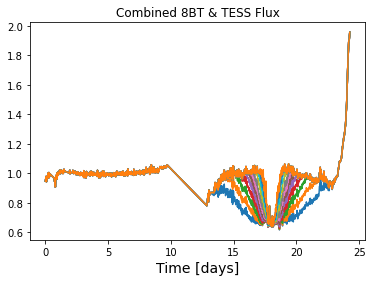

In [29]:
#inject into TESS data
shape = 'Square'#'Circle'
index= 0
w_or_d = 'W'

if shape == 'Triangle':
    image_ratios = np.array([0.07, 0.16, 0.25, 0.34, 0.43, .49]) #TRIANGLES
    image_ratios = 1/ np.sqrt(1- 2*image_ratios)
    image_ratio = 1.4

else:
    image_ratios = np.array([0.07, 0.16, 0.25, 0.34, 0.43, 0.52, 0.61, 0.70, 0.79, 0.88, 0.97, .99])
    image_ratios = 1/ np.sqrt(1- image_ratios)
    image_ratio = 2
    
velocities = np.array([.3, .4 , .5, .6, .7, .8, .9, 1.0, 1.2, 1.4, 1.6, 1.8])
velocity = 0.6


if w_or_d == 'W':
    for velocity in velocities:
        image_ratio = str(image_ratio)
        velocity = str(velocity)
        make_lc(shape, image_ratio, velocity, index)
    print("tic id " + tic_id)

if w_or_d == 'D':
    for image_ratio in image_ratios:
        image_ratio = str(image_ratio)
        velocity = str(velocity)
        make_lc(shape, image_ratio, velocity, index)

plt.show()

[10.11196911  7.56833977  6.06718147  4.31583012  3.02316602  1.66795367]
[0.3 0.4 0.5 0.7 1.  1.8]


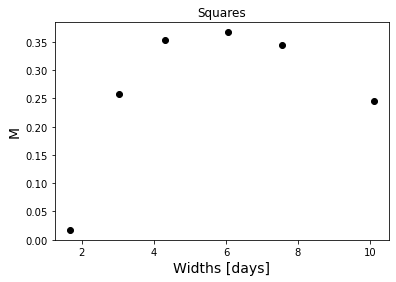

In [34]:
shape = shape
tic_id = tic_id

if w_or_d == 'W':
    widths = find_width(shape, image_ratio)
    plot_mstat_width(shape, image_ratio, widths, tic_id)

if w_or_d == 'D':
    plot_mstat_depth(shape, tic_id)

In [64]:
#circle_scores = function("Circle")
#triangle_scores = function("Triangle")

scores = function("Square")
print(scores)


scores["detected"] = ((scores["ranks"] < 80000) & (scores["mstat"] > 0.25)).astype(int)
print(scores)

     scores    ranks  min_flux     mstat     widths
0  0.002314   5079.0  0.616778  0.244903  10.111969
1  0.001332  24420.0  0.619514  0.344529   7.568340
2  0.001274  27798.0  0.623219  0.367167   6.067181
3  0.001101  44453.0  0.636875  0.352559   4.315830
4  0.000965  69100.0  0.637663  0.258230   3.023166
5  0.000934  77761.0  0.637753  0.017388   1.667954
     scores    ranks  min_flux     mstat     widths  detected
0  0.002314   5079.0  0.616778  0.244903  10.111969         0
1  0.001332  24420.0  0.619514  0.344529   7.568340         1
2  0.001274  27798.0  0.623219  0.367167   6.067181         1
3  0.001101  44453.0  0.636875  0.352559   4.315830         1
4  0.000965  69100.0  0.637663  0.258230   3.023166         1
5  0.000934  77761.0  0.637753  0.017388   1.667954         0


1.0184758473652127 -0.018475847365212683


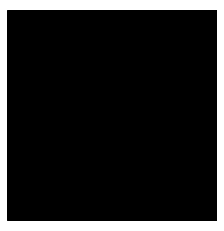

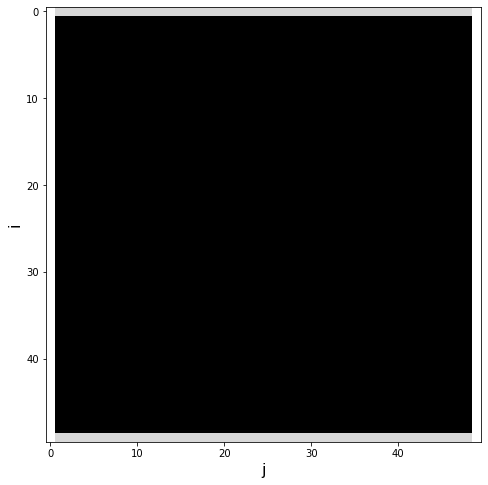

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


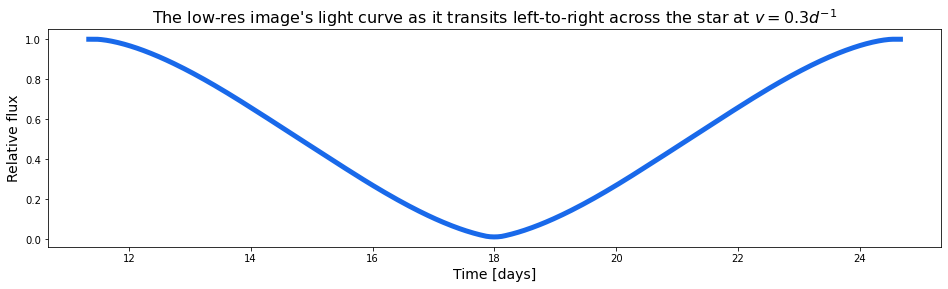

min: 0.012893348745767752


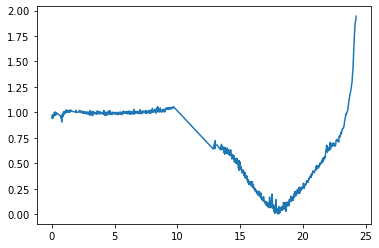

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.874036  0.010542
943  24.187188  1.886752  0.010689
944  24.208021  1.893793  0.010823
945  24.228854  1.917579  0.010962
946  24.249687  1.943866  0.011101

[947 rows x 3 columns]
0.6495729658866991
1.045544725589981 -0.045544725589980906


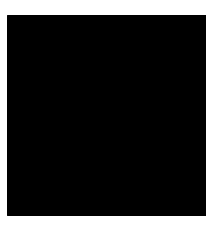

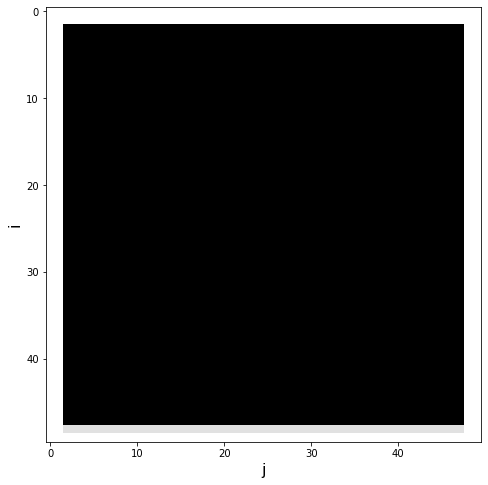

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


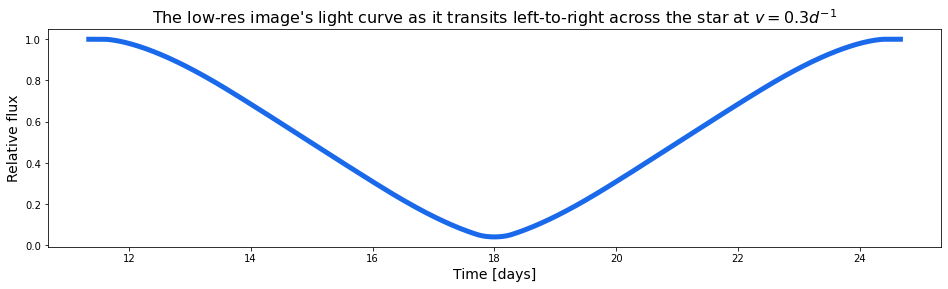

min: 0.04155591903870892


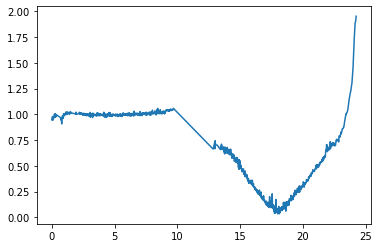

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.882920  0.010542
943  24.187188  1.895279  0.010689
944  24.208021  1.901958  0.010823
945  24.228854  1.925364  0.010962
946  24.249687  1.951256  0.011101

[947 rows x 3 columns]
0.6787921041898654
1.0773502691896257 -0.07735026918962584


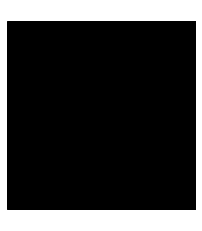

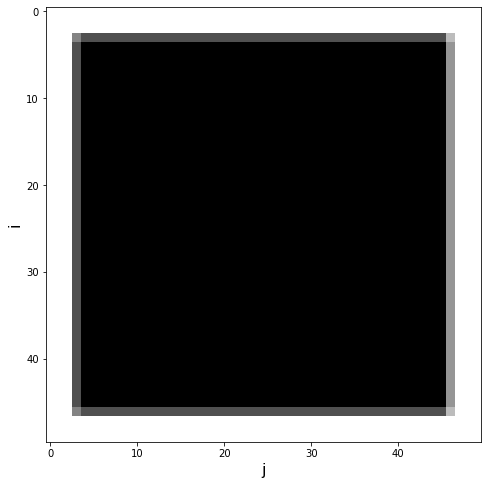

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


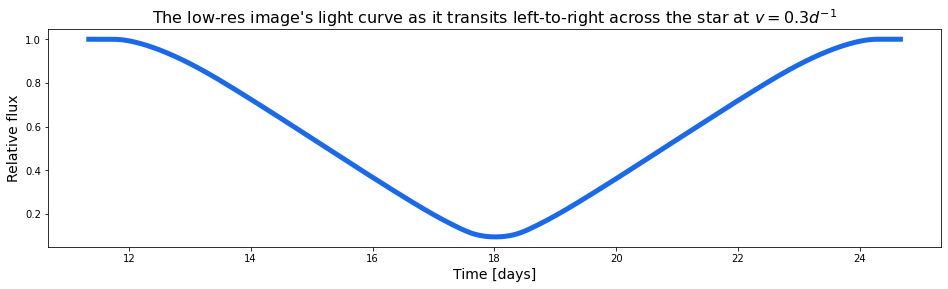

min: 0.09482239804283465


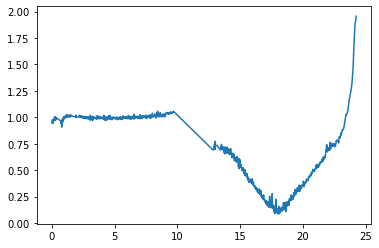

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.889878  0.010542
943  24.187188  1.901600  0.010689
944  24.208021  1.907626  0.010823
945  24.228854  1.930364  0.010962
946  24.249687  1.955555  0.011101

[947 rows x 3 columns]
0.7026567674847788
1.1154574548966636 -0.1154574548966637


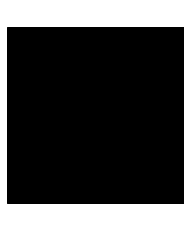

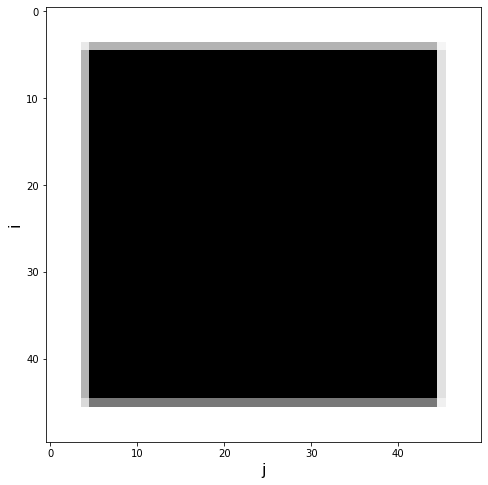

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


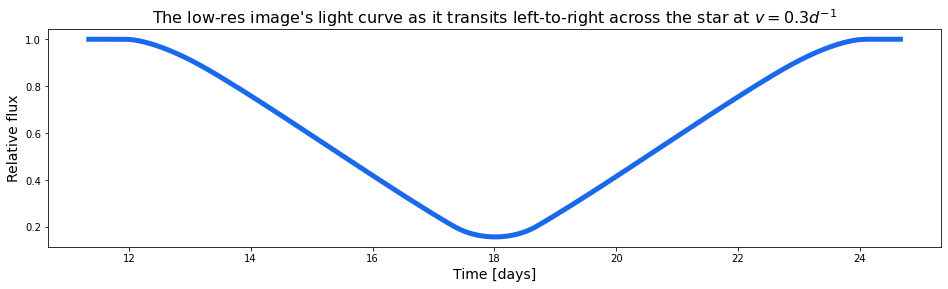

min: 0.15753618199188413


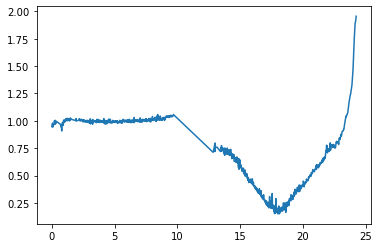

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.7199222442987132
1.162266178532522 -0.1622661785325219


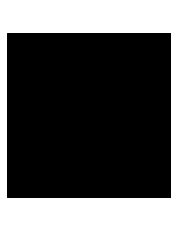

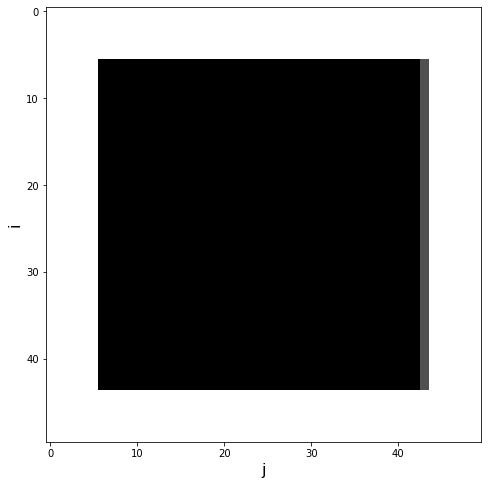

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


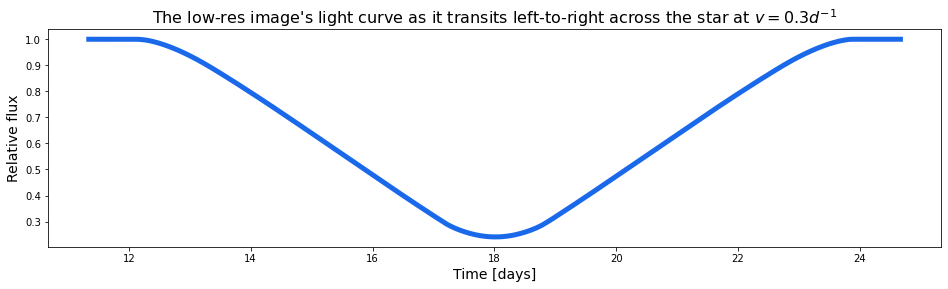

min: 0.2411663473674761


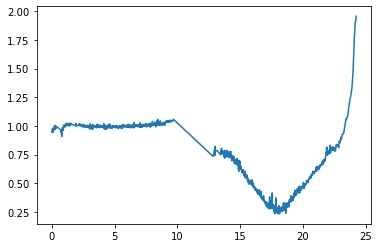

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.6965037066230835
1.2216878364870323 -0.22168783648703216


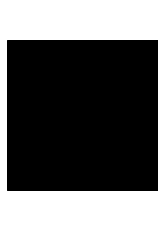

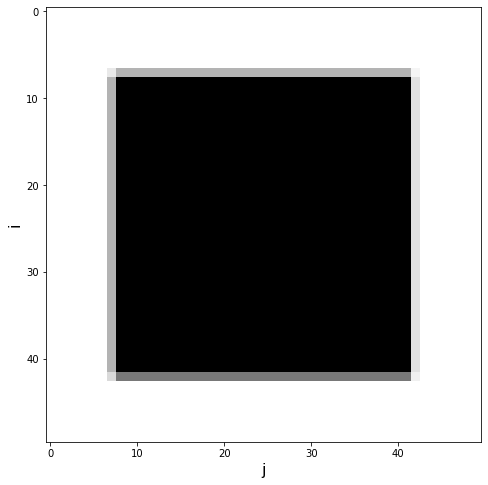

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


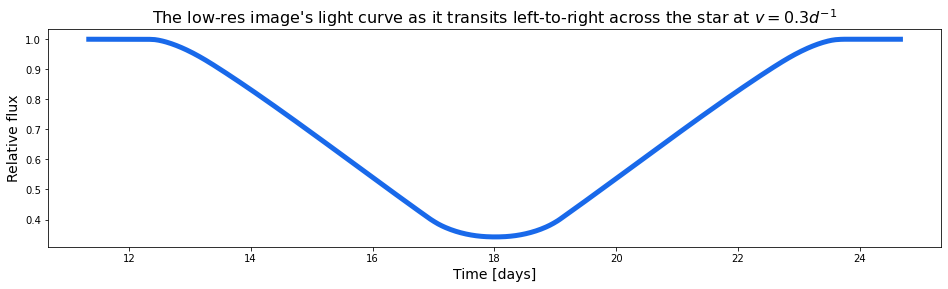

min: 0.34211164900023605


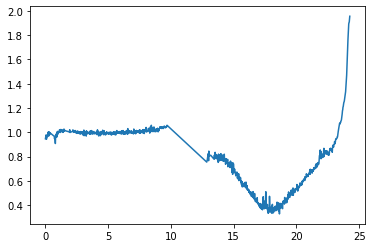

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.6444670938584953
1.3006407690254358 -0.3006407690254357


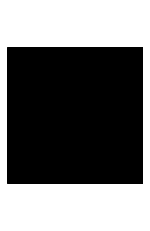

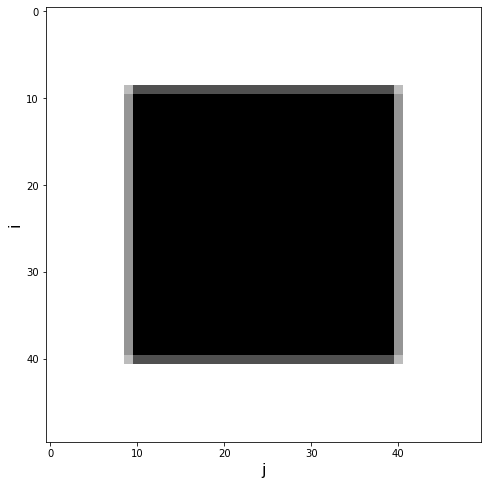

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


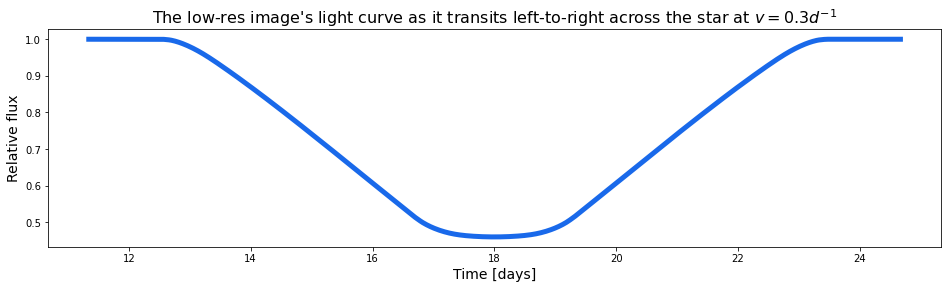

min: 0.4597127996830557


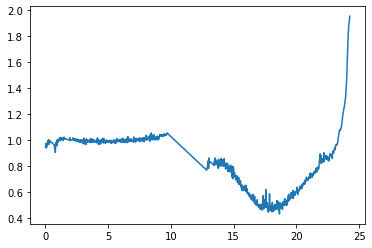

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.567337848709391
1.4128709291752768 -0.4128709291752768


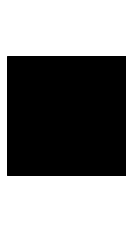

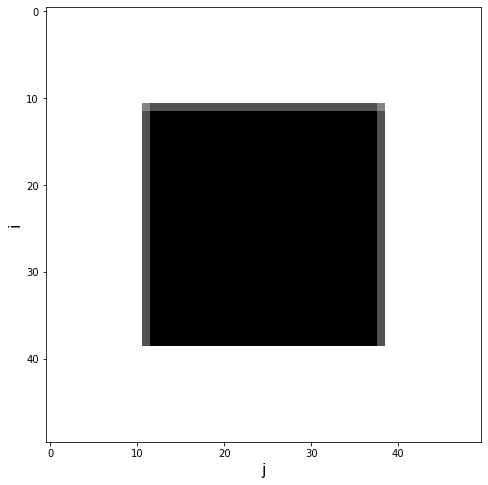

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


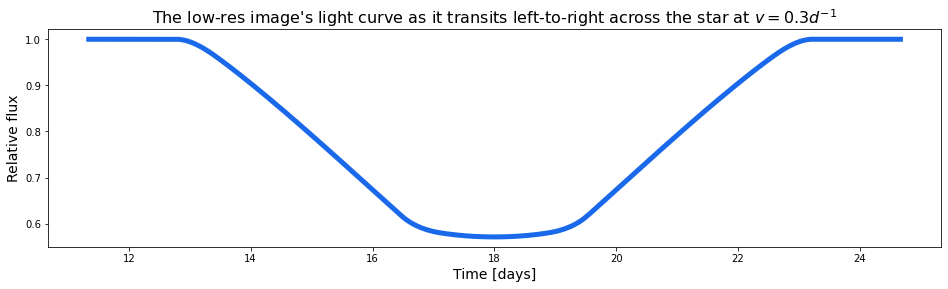

min: 0.5714326800864424


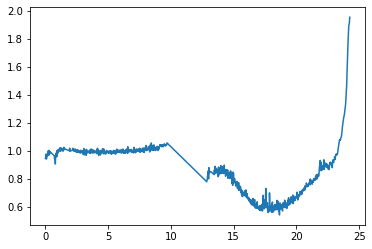

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.39686284956076323
1.591089451179962 -0.591089451179962


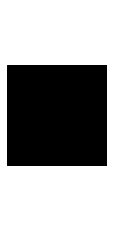

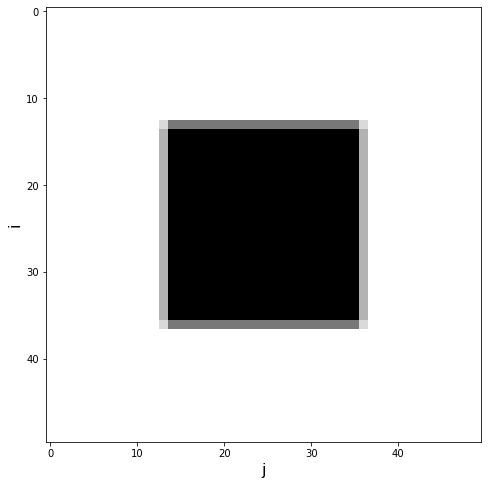

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


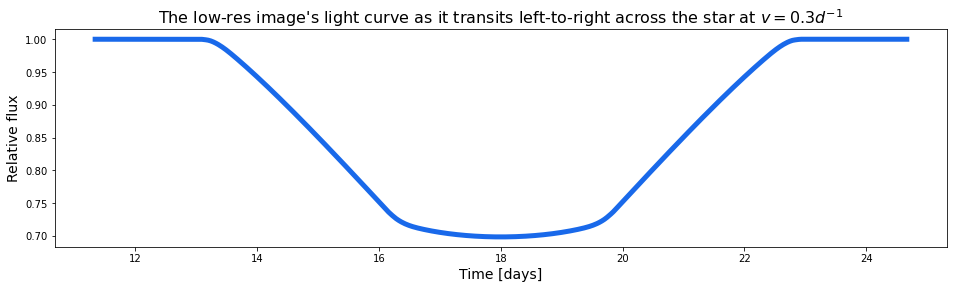

min: 0.6983941258921768


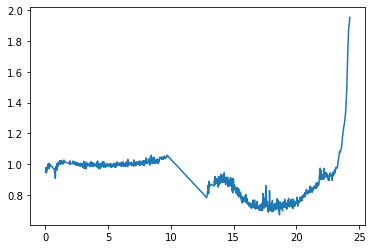

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.11429951791084852
1.9433756729740643 -0.9433756729740643


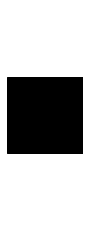

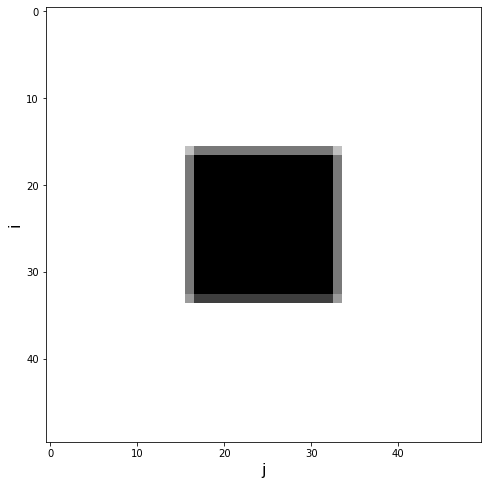

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


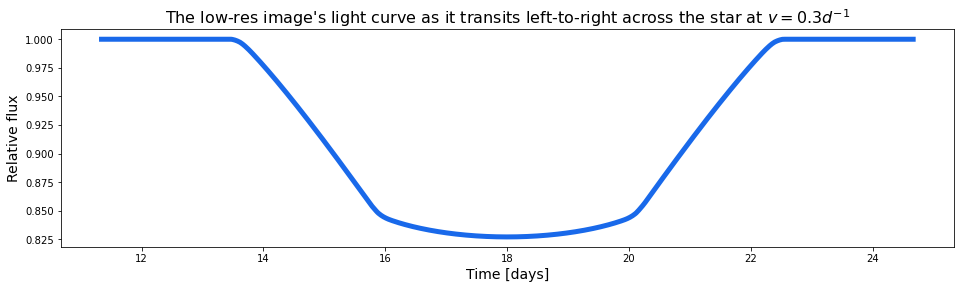

min: 0.8270015439987466


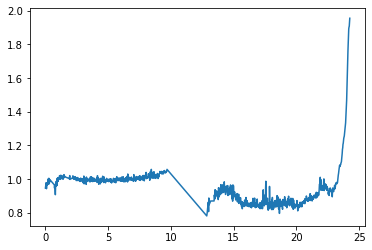

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.2756927636877326
3.3867513459481273 -2.3867513459481273


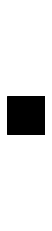

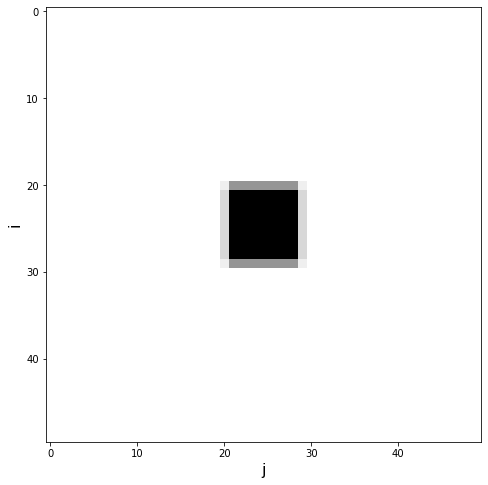

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


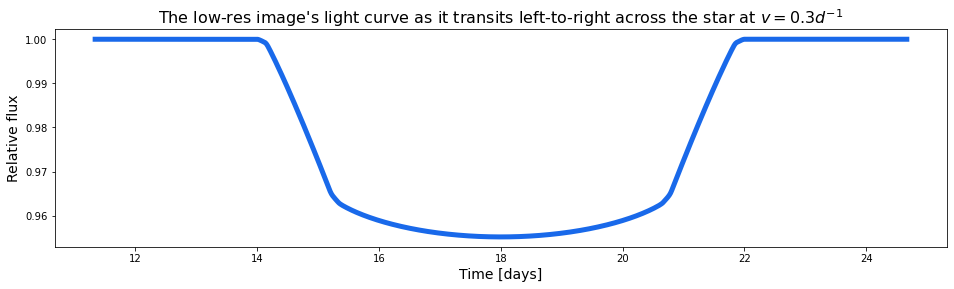

min: 0.9551852426346387


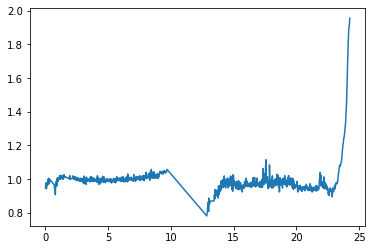

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5665365832856248
5.499999999999997 -4.499999999999997


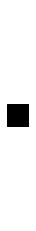

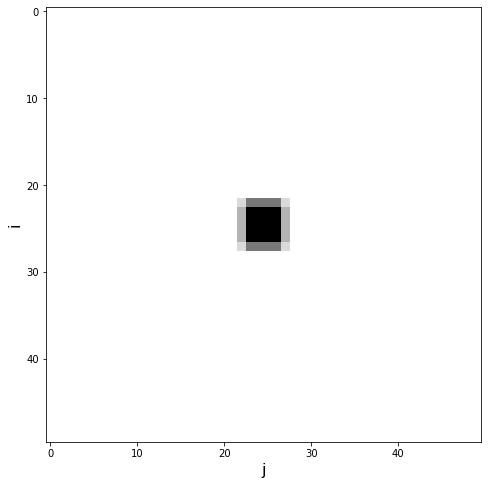

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


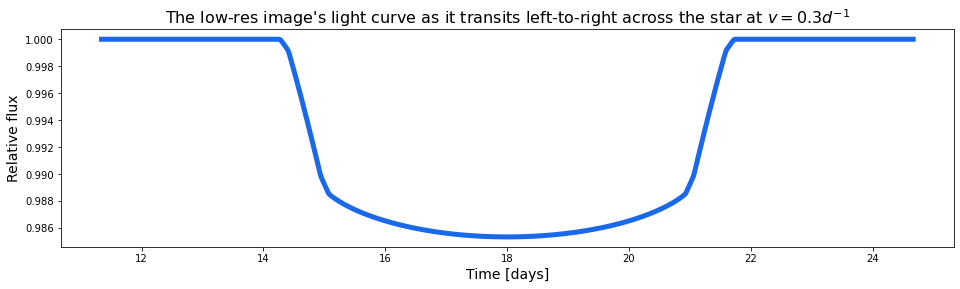

min: 0.9853296464647792


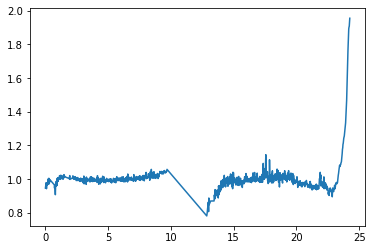

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5439938025696751
1.0184758473652127 -0.018475847365212683


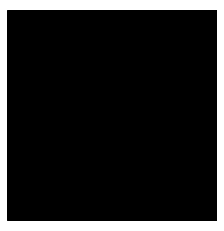

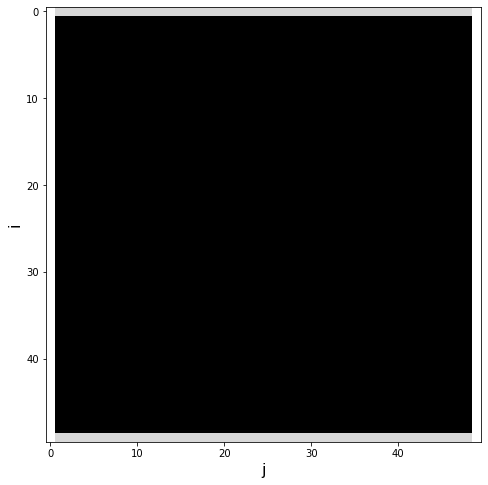

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


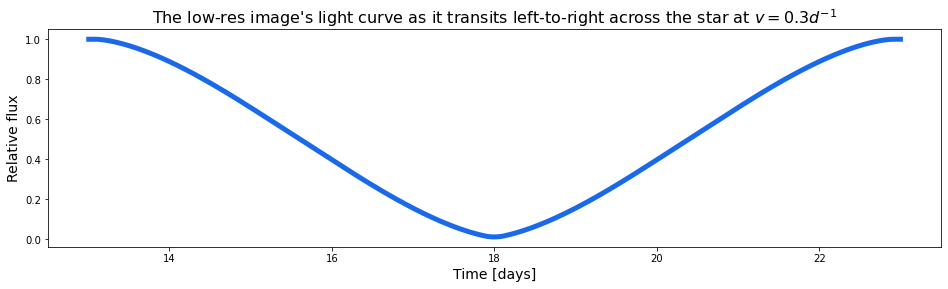

min: 0.012896722209896794


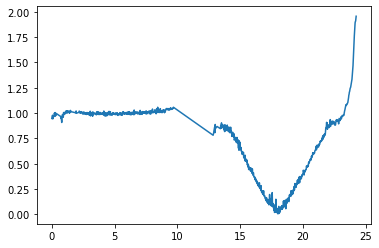

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9335619430984543
1.045544725589981 -0.045544725589980906


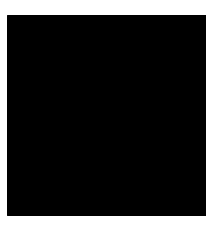

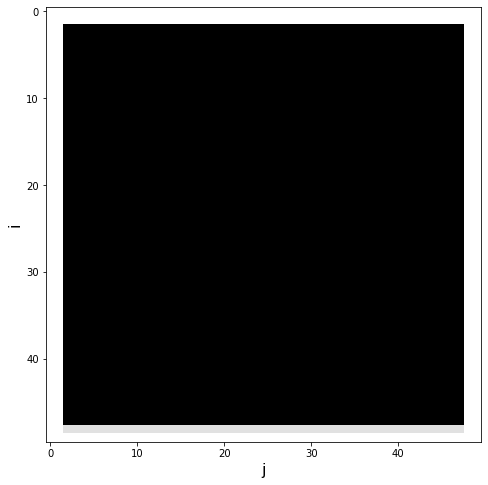

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


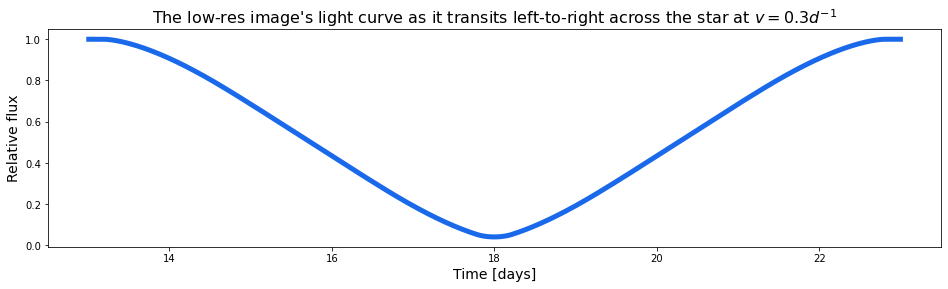

min: 0.041557881283439846


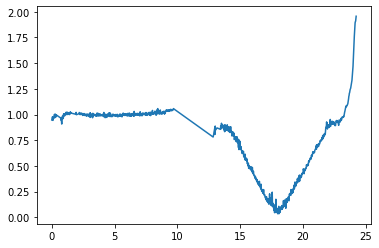

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9244190171180939
1.0773502691896257 -0.07735026918962584


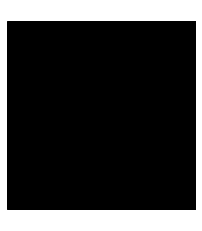

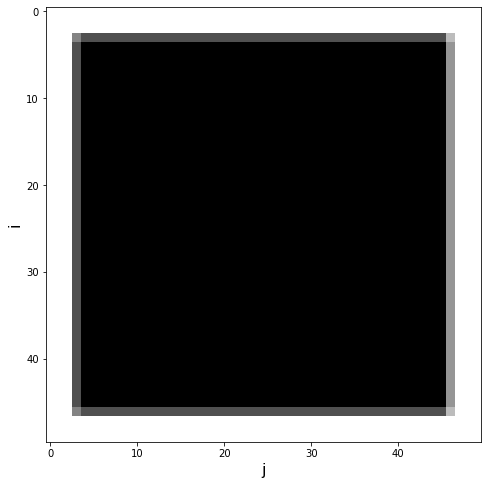

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


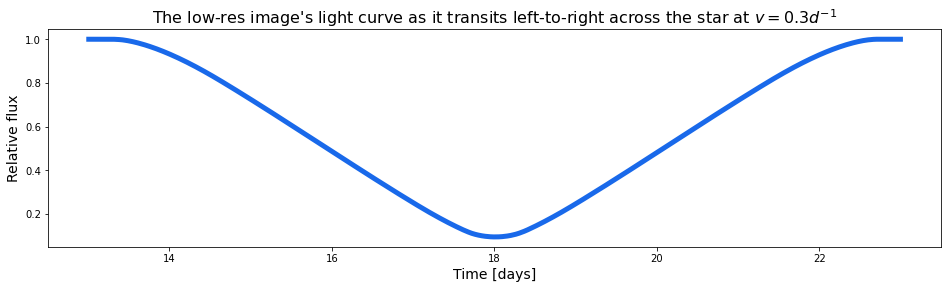

min: 0.09483951528249213


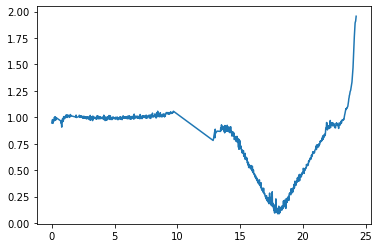

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9033748085717955
1.1154574548966636 -0.1154574548966637


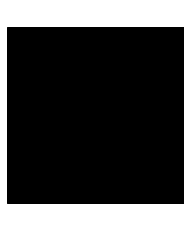

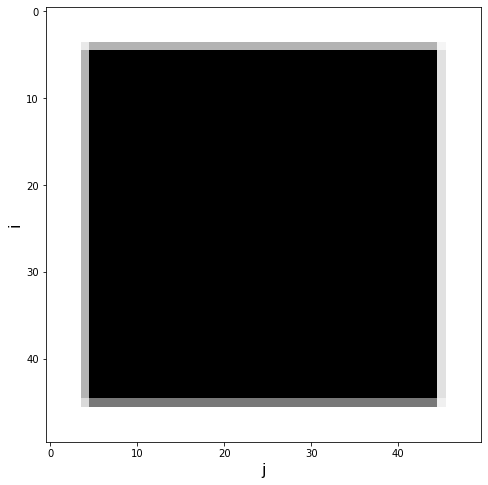

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


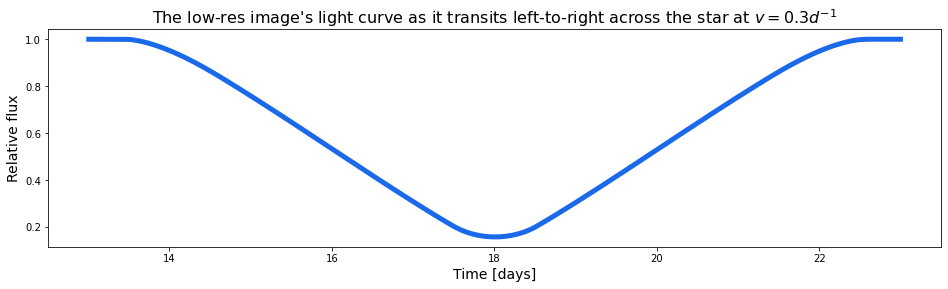

min: 0.15755265084089987


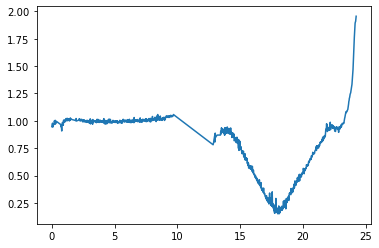

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.8706107284889193
1.162266178532522 -0.1622661785325219


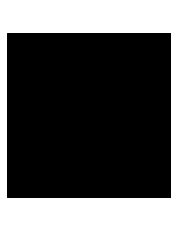

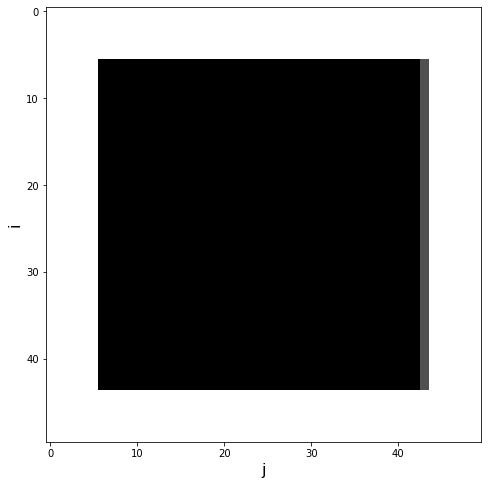

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


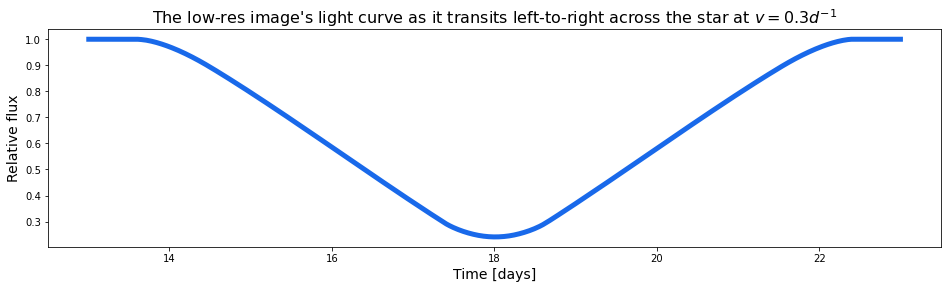

min: 0.24117807579037753


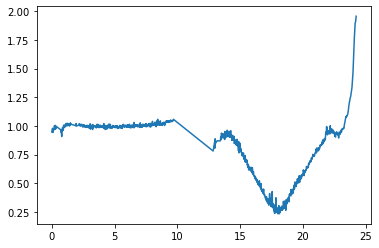

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.8273381401902197
1.2216878364870323 -0.22168783648703216


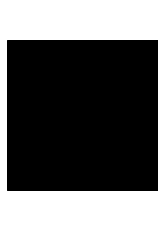

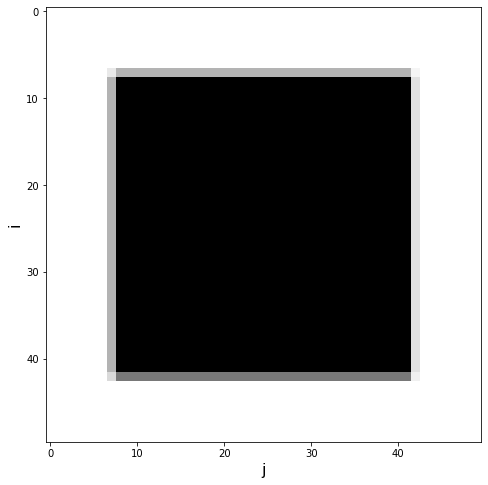

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


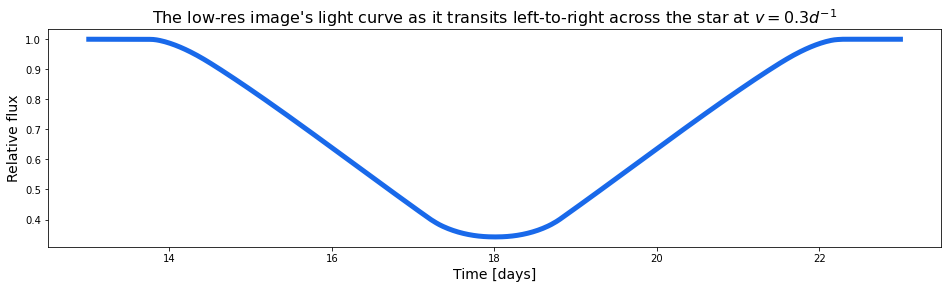

min: 0.34211161011015034


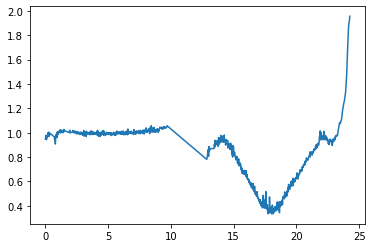

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.762678672227876
1.3006407690254358 -0.3006407690254357


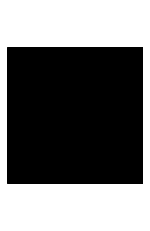

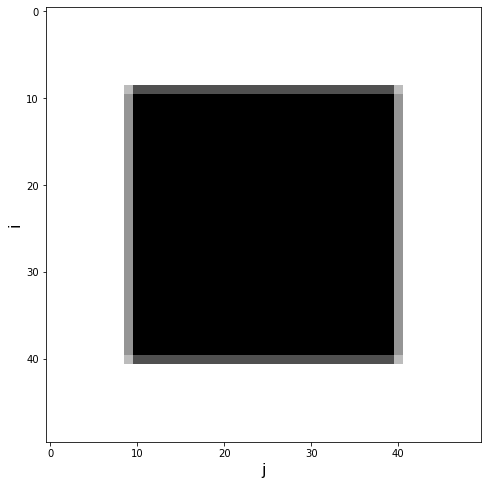

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


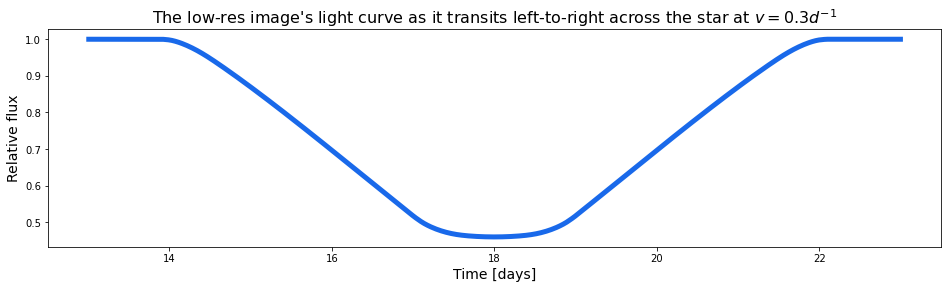

min: 0.4597133765872208


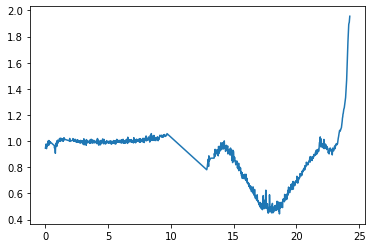

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.6367385711057618
1.4128709291752768 -0.4128709291752768


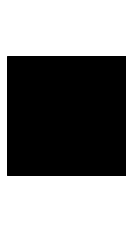

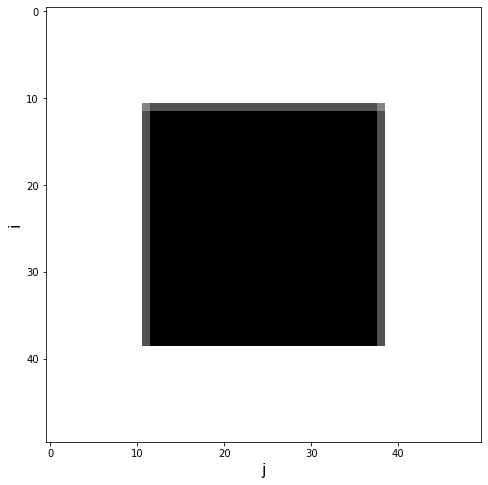

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


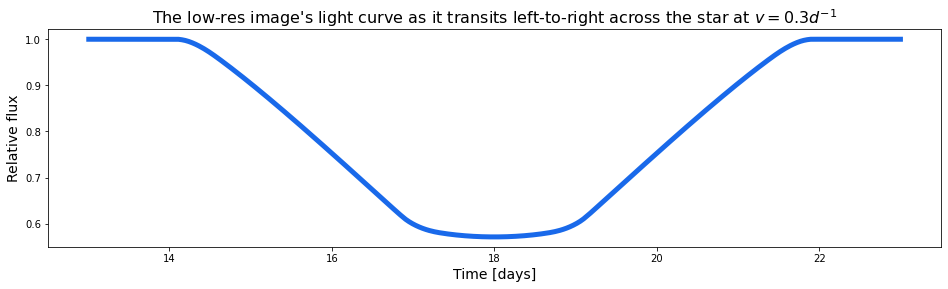

min: 0.5714330780101874


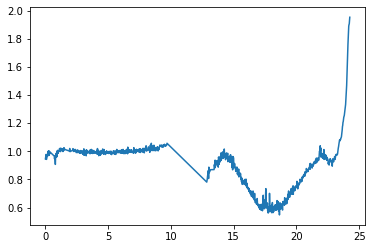

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.4845640564275964
1.591089451179962 -0.591089451179962


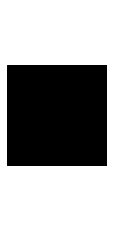

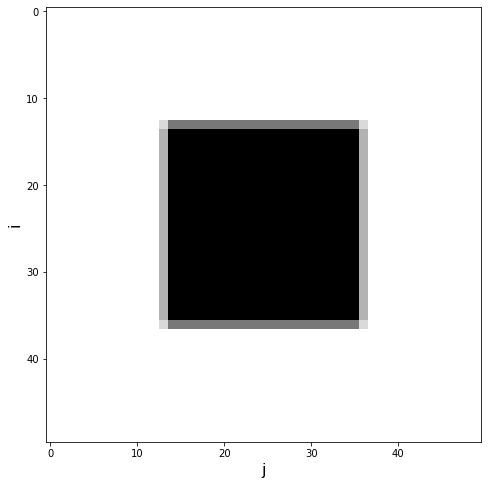

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


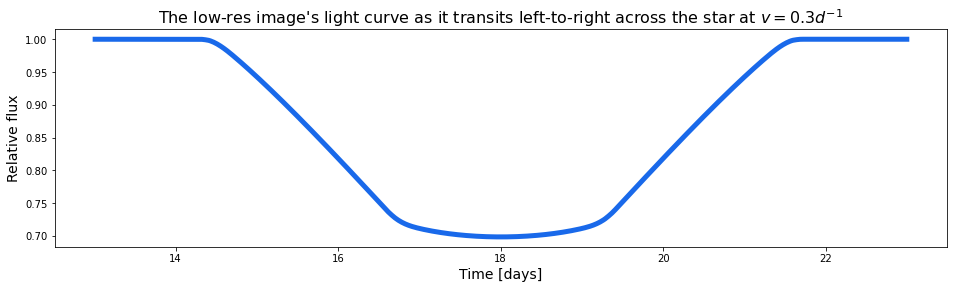

min: 0.6983943748641636


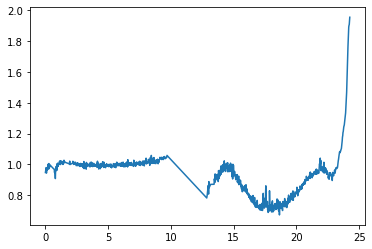

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.21110252043162303
1.9433756729740643 -0.9433756729740643


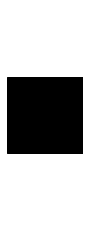

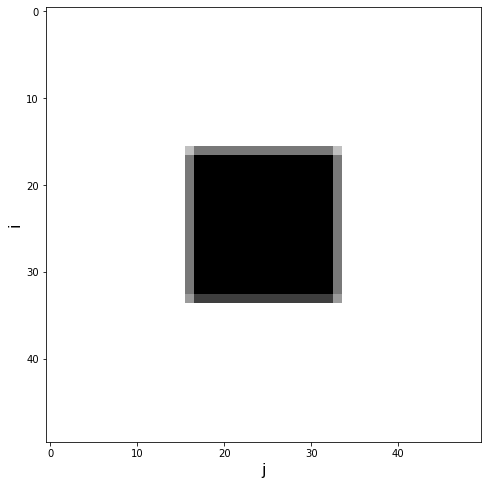

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


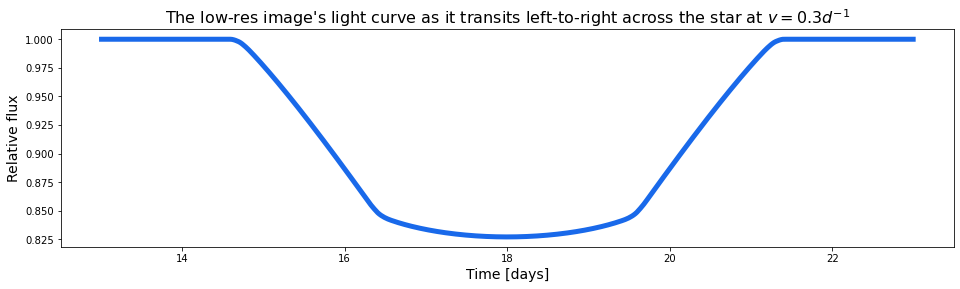

min: 0.8270016739500172


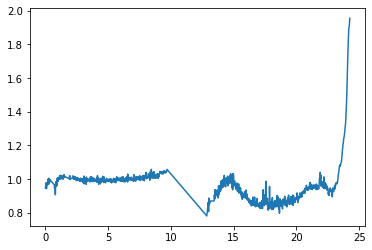

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.2137063650530922
3.3867513459481273 -2.3867513459481273


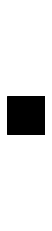

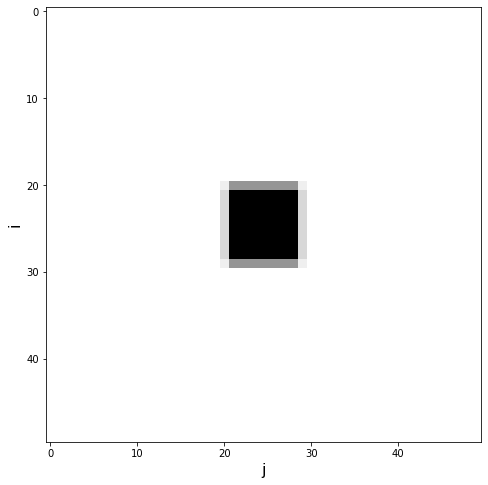

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


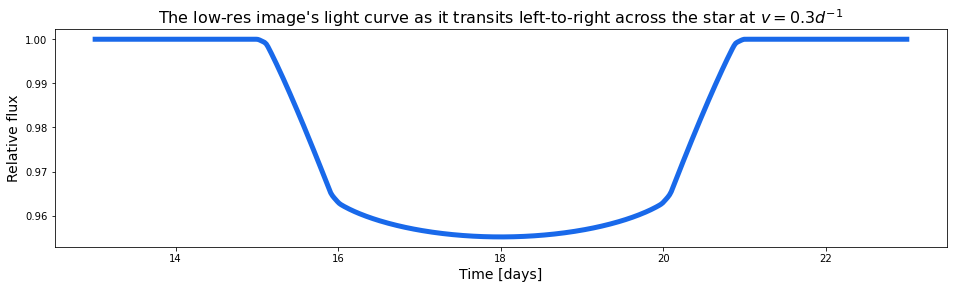

min: 0.9551852737223069


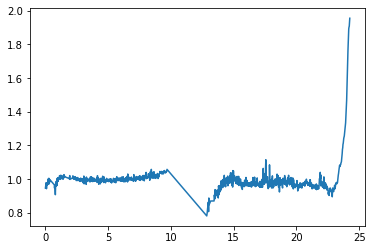

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5725773186558225
5.499999999999997 -4.499999999999997


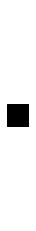

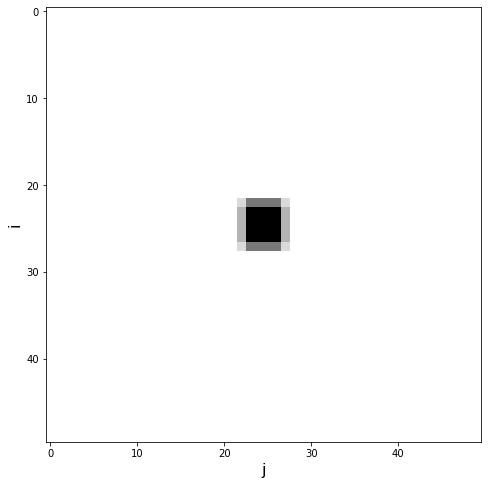

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


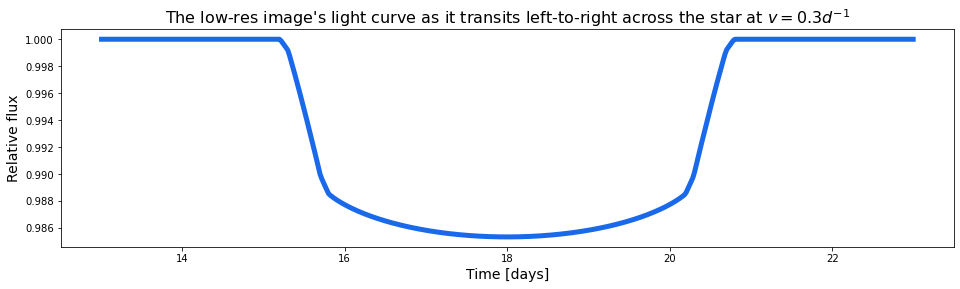

min: 0.9853296564743026


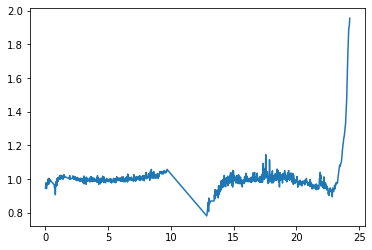

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5423279591084049
1.0184758473652127 -0.018475847365212683


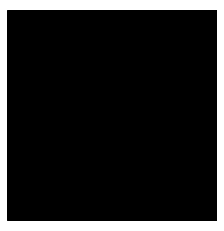

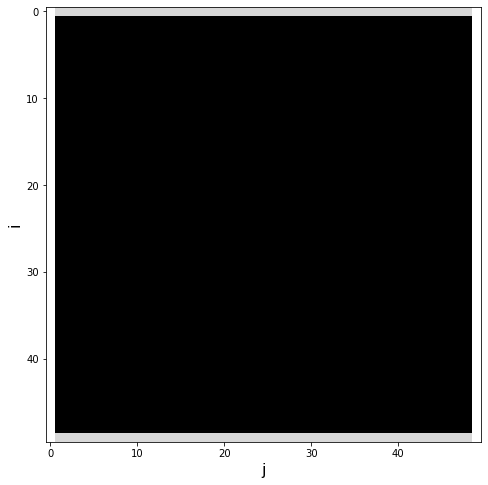

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


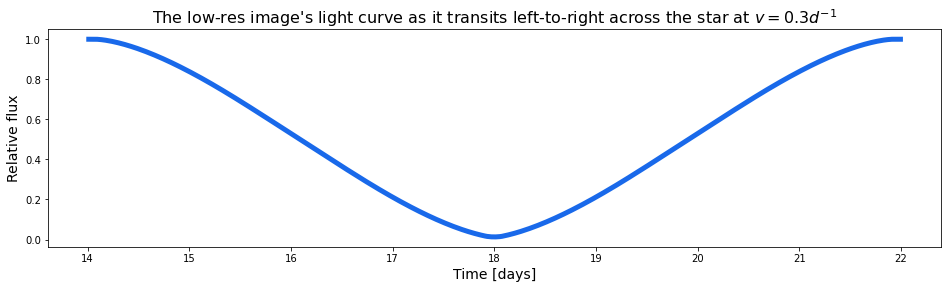

min: 0.012902900996609734


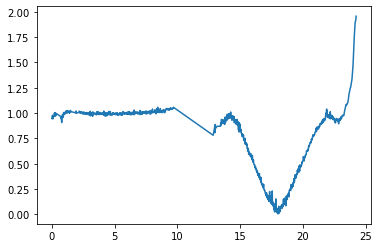

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.993130650461992
1.045544725589981 -0.045544725589980906


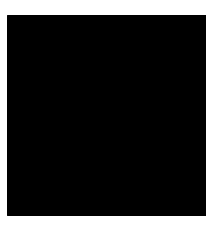

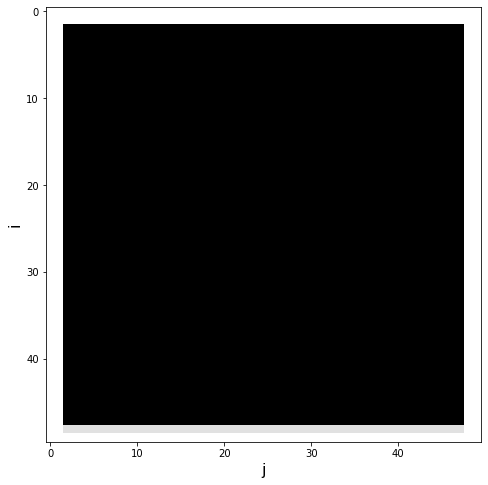

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


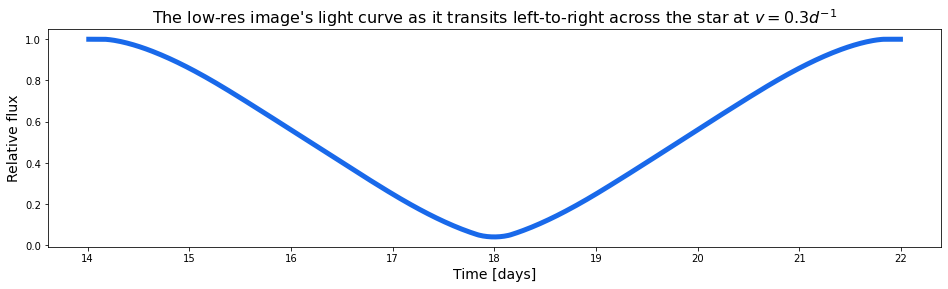

min: 0.04156228945444518


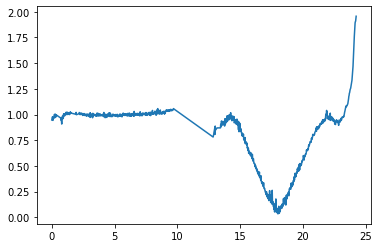

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9934679879459737
1.0773502691896257 -0.07735026918962584


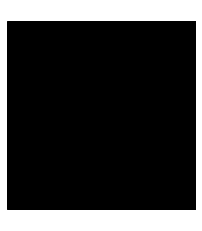

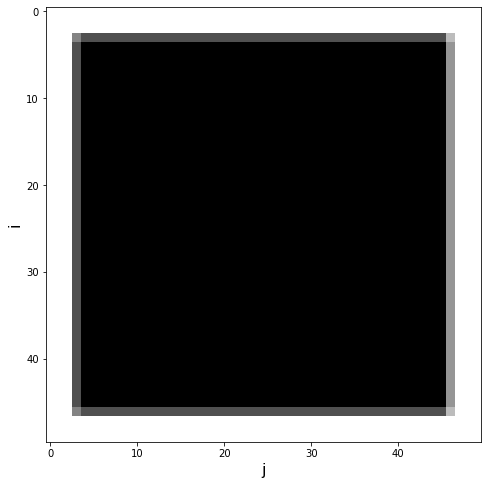

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


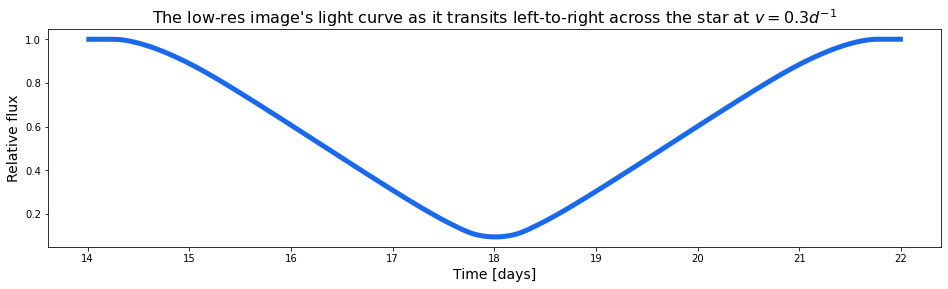

min: 0.09484145021836554


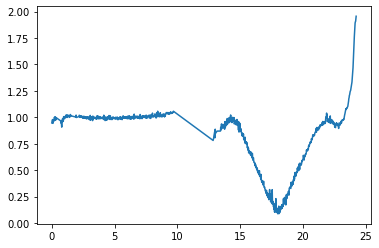

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9740938993742078
1.1154574548966636 -0.1154574548966637


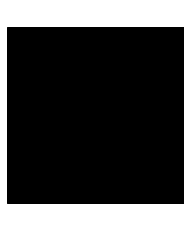

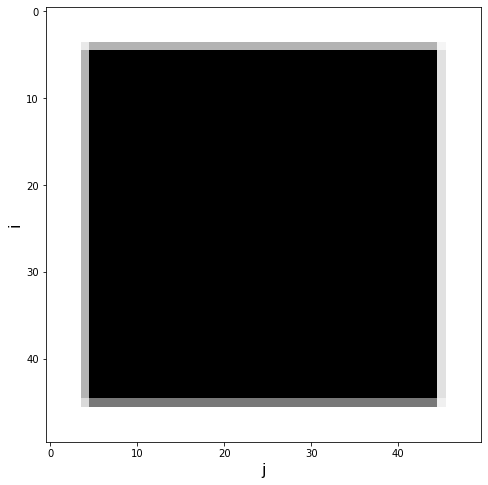

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


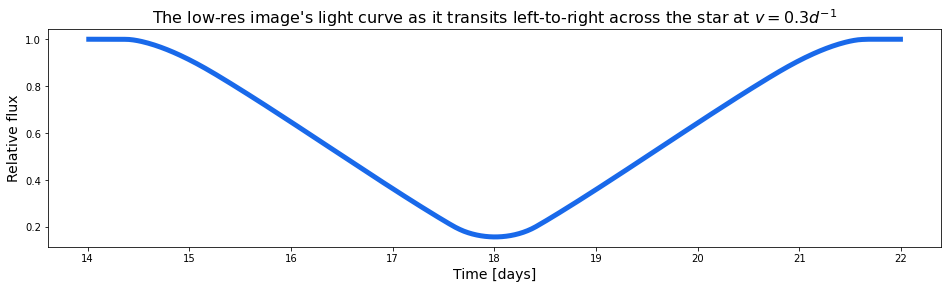

min: 0.1575615406450812


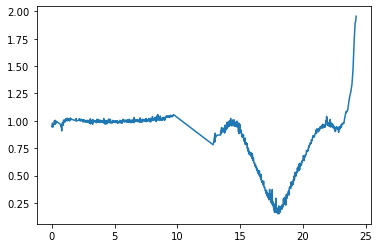

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9447736344706433
1.162266178532522 -0.1622661785325219


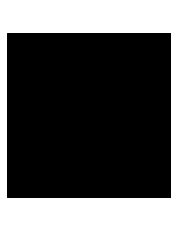

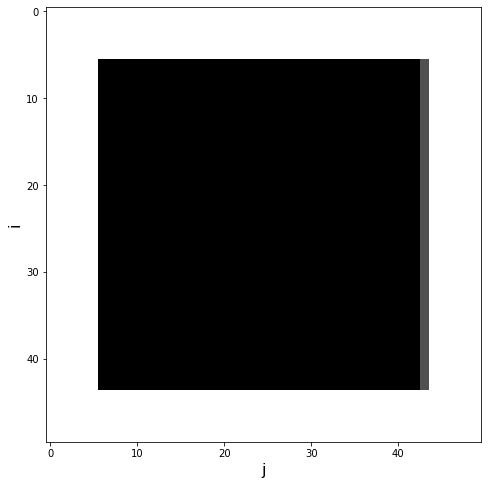

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


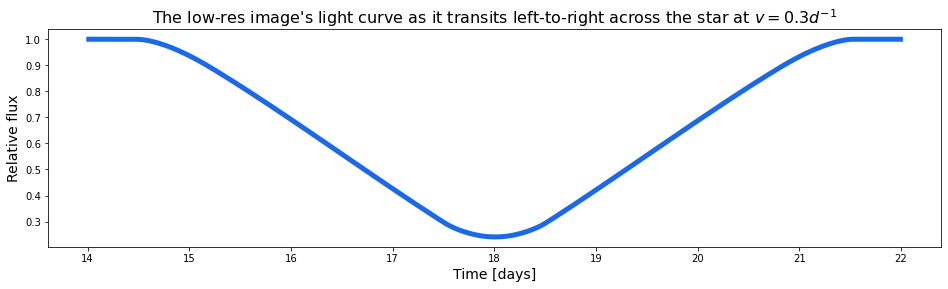

min: 0.24118967357455356


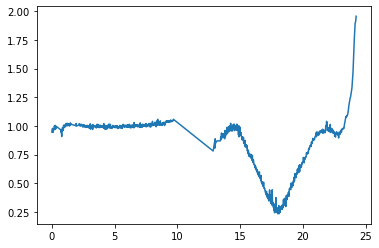

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.8927555677805573
1.2216878364870323 -0.22168783648703216


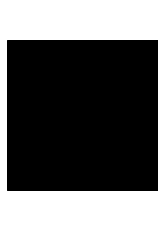

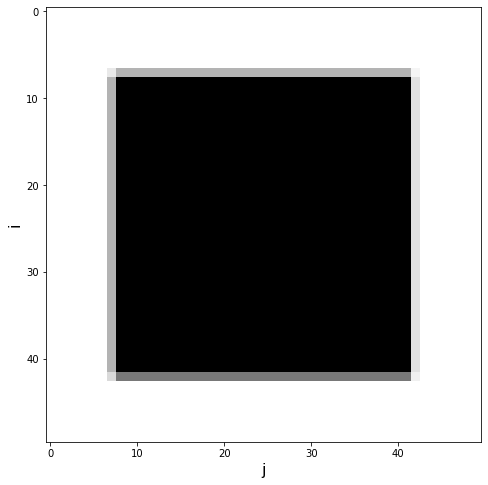

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


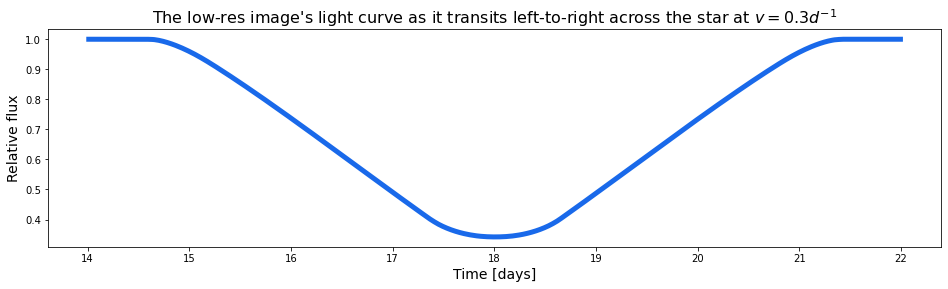

min: 0.3421129193531335


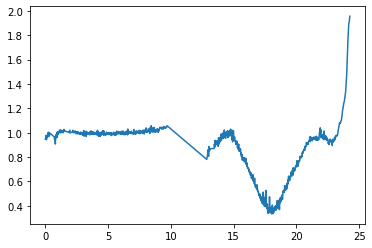

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.8144800148473793
1.3006407690254358 -0.3006407690254357


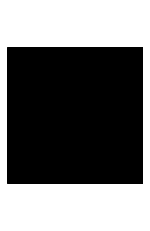

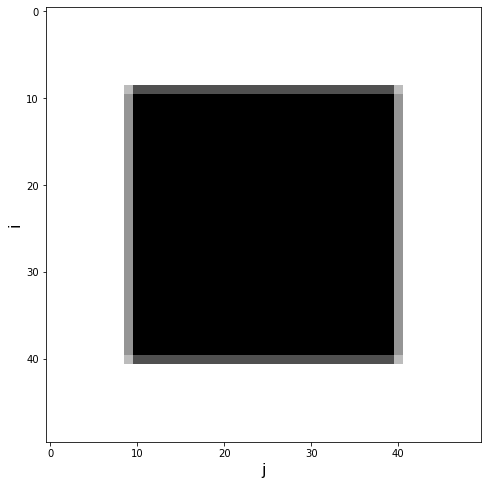

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


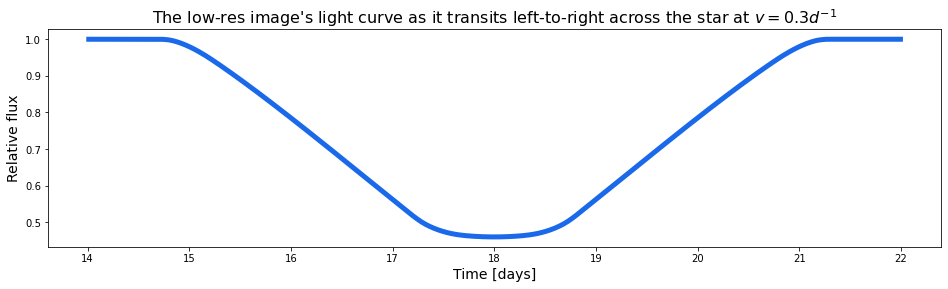

min: 0.45971411832818654


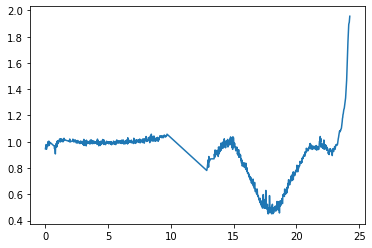

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.6949118646279516
1.4128709291752768 -0.4128709291752768


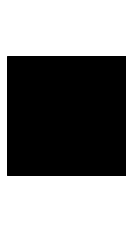

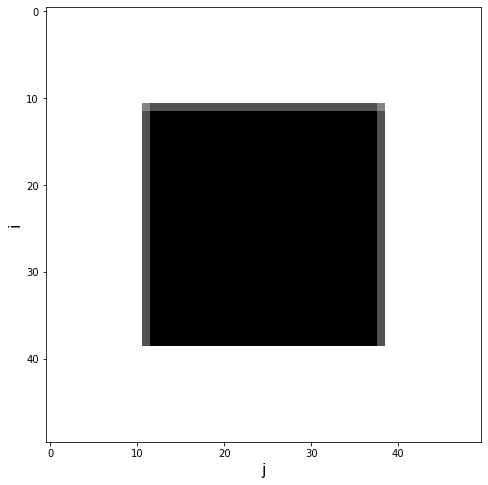

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


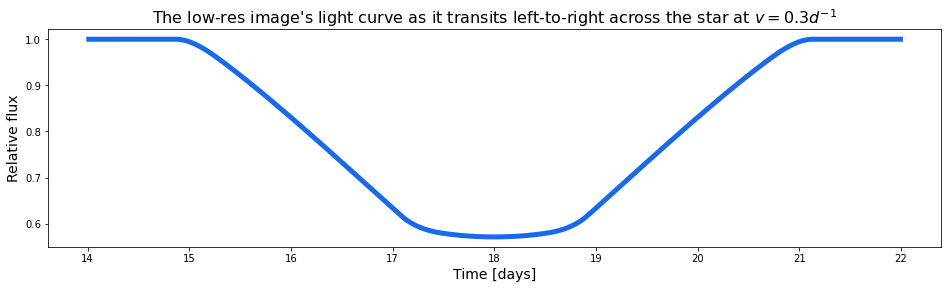

min: 0.5714335896291449


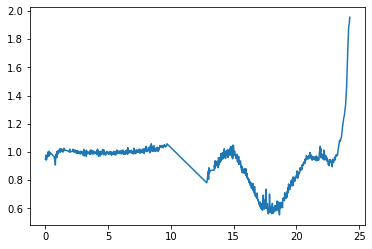

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.521097018237874
1.591089451179962 -0.591089451179962


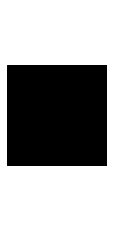

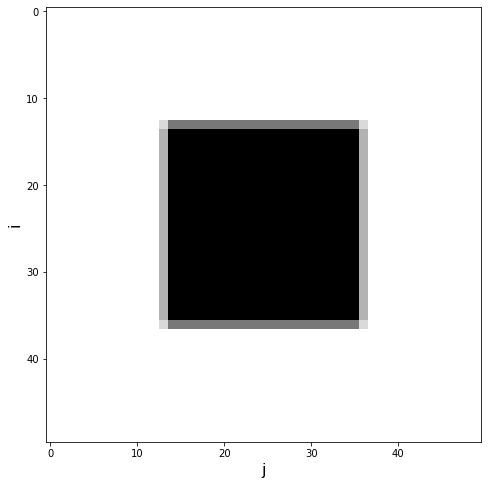

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


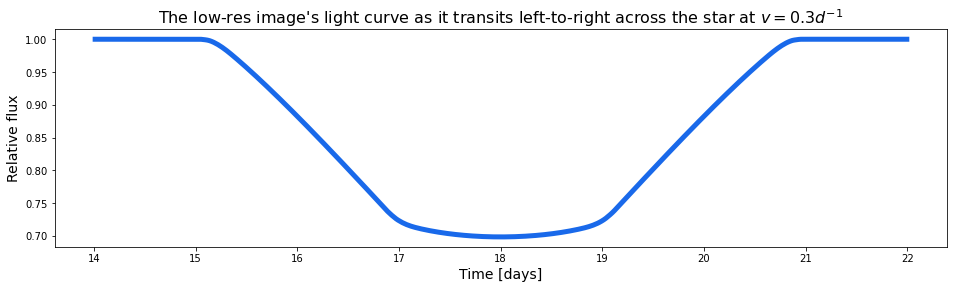

min: 0.6983946949721402


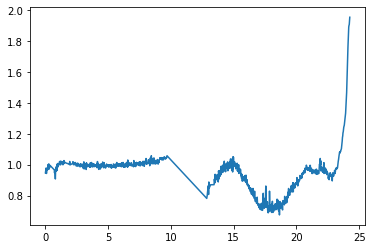

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.22778027708434126
1.9433756729740643 -0.9433756729740643


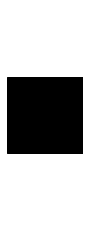

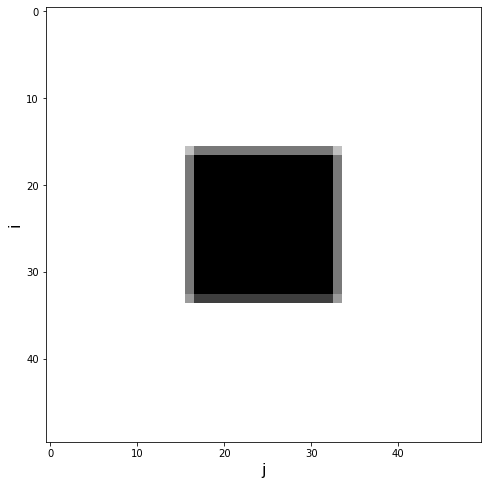

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


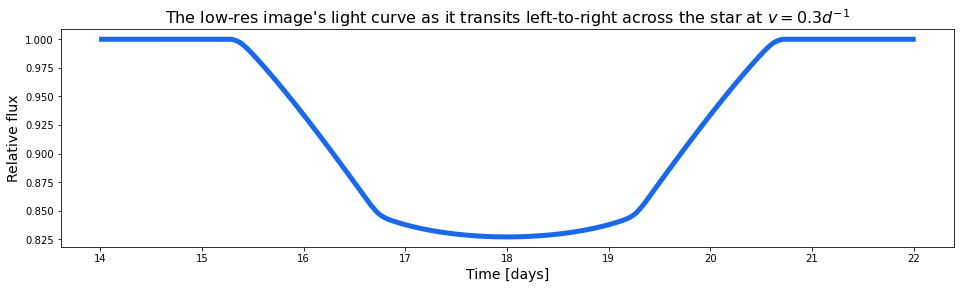

min: 0.8270018410306637


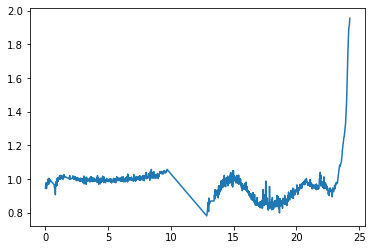

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.21198514746941452
3.3867513459481273 -2.3867513459481273


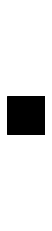

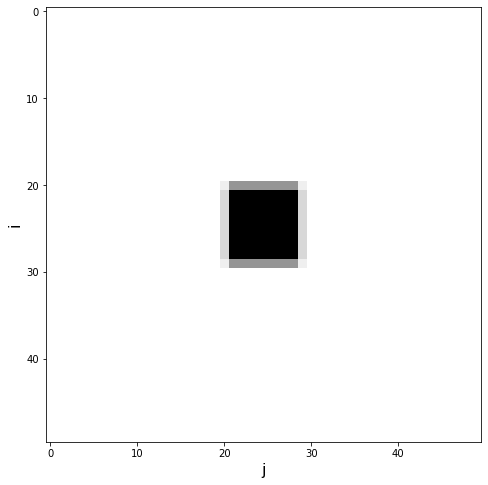

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


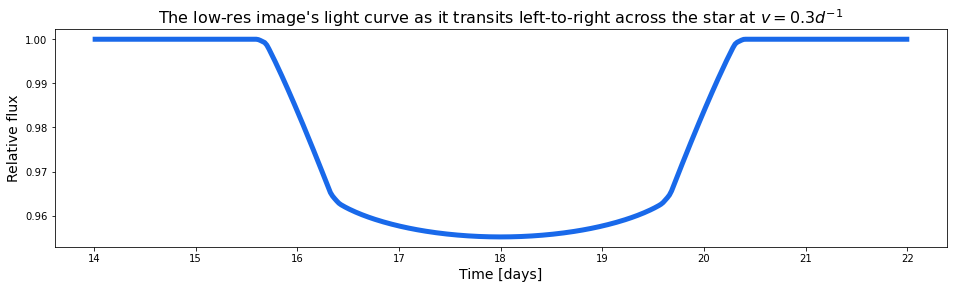

min: 0.9551853136922489


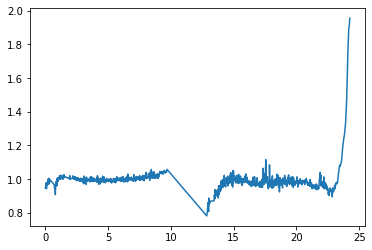

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5671614697245483
5.499999999999997 -4.499999999999997


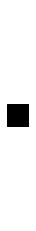

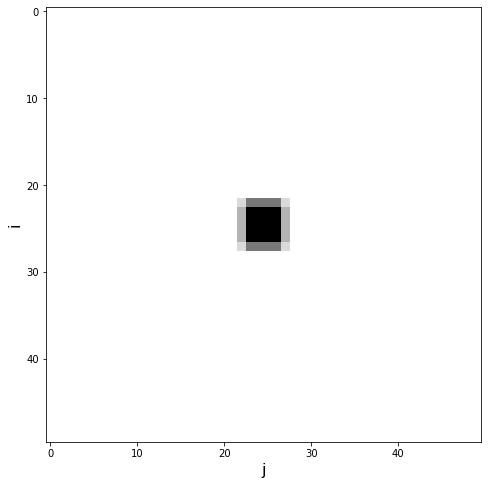

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


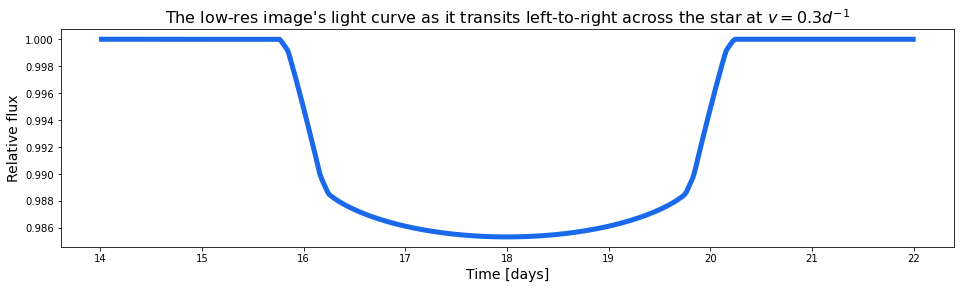

min: 0.9853296693437154


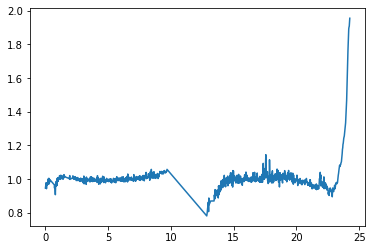

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5350689986209981
1.0184758473652127 -0.018475847365212683


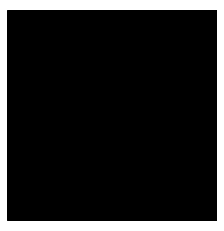

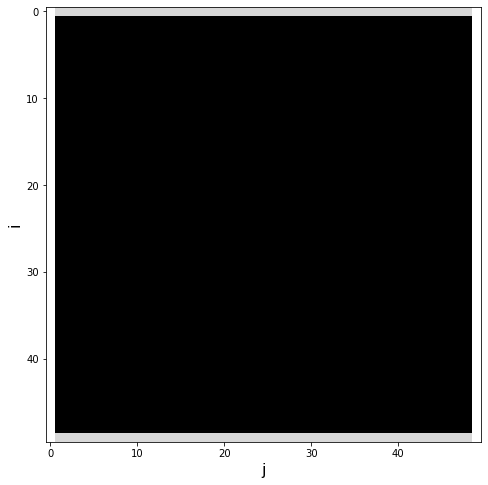

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


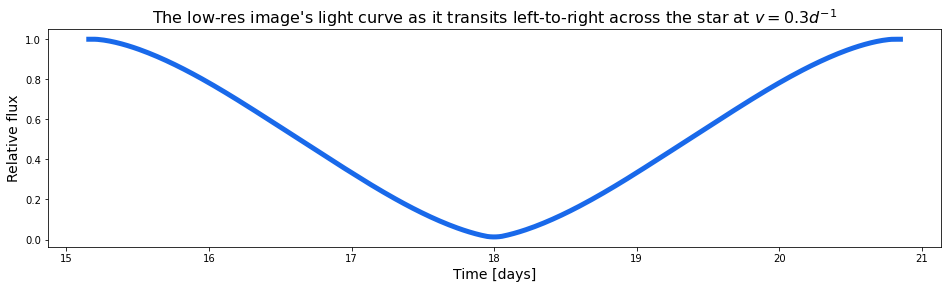

min: 0.012927410628290281


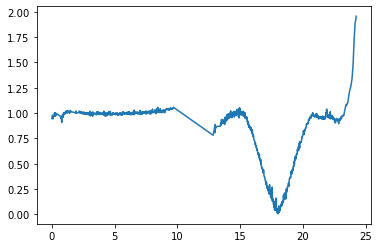

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
1.0667436484985071
1.045544725589981 -0.045544725589980906


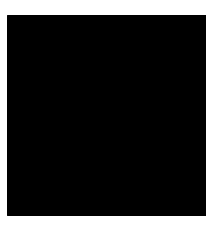

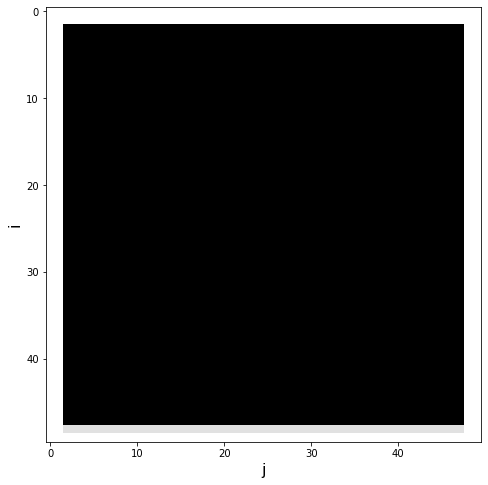

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


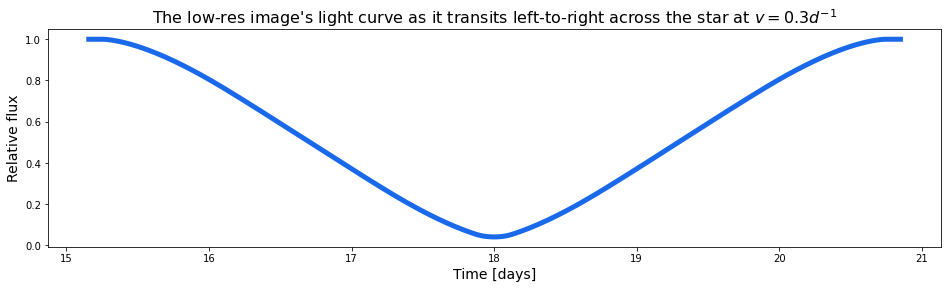

min: 0.0415803858392465


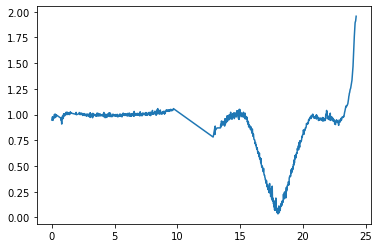

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
1.0502357323524272
1.0773502691896257 -0.07735026918962584


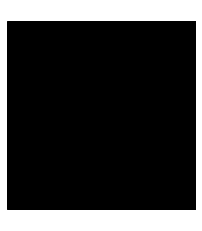

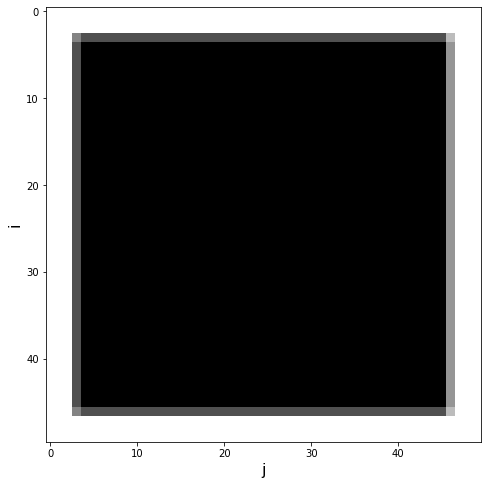

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


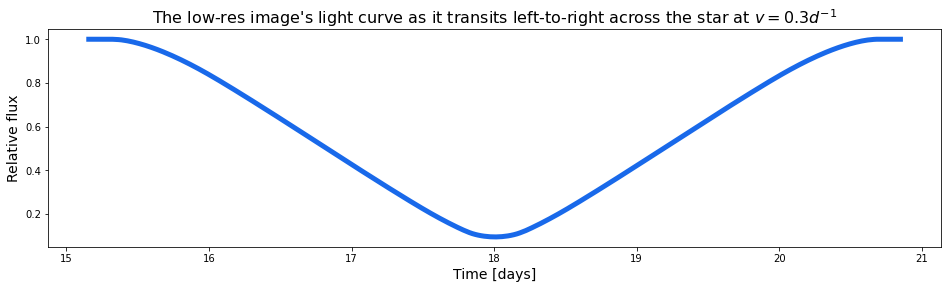

min: 0.09484466134433811


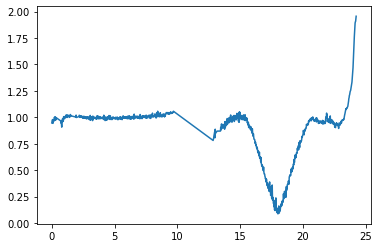

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
1.0187319866323408
1.1154574548966636 -0.1154574548966637


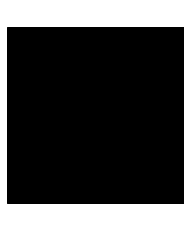

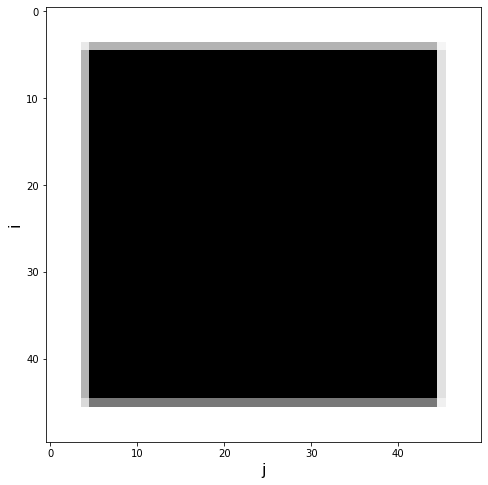

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


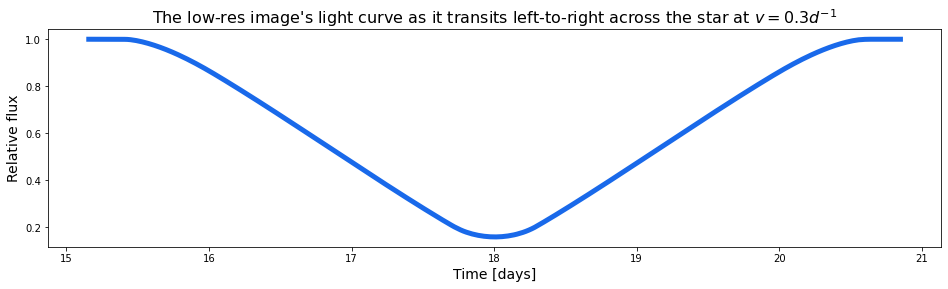

min: 0.15756896858127278


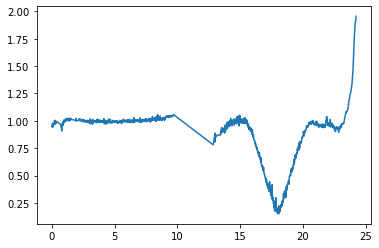

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9760451943795109
1.162266178532522 -0.1622661785325219


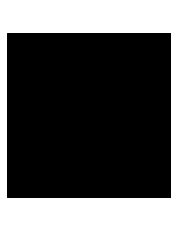

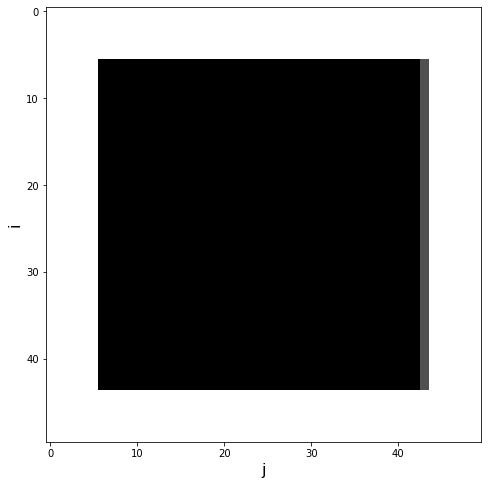

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


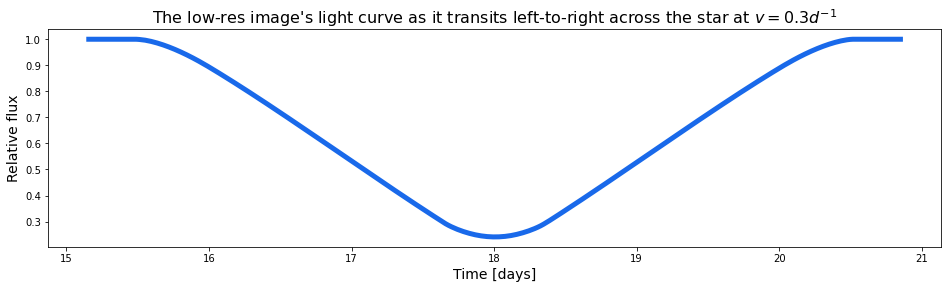

min: 0.24119850364552708


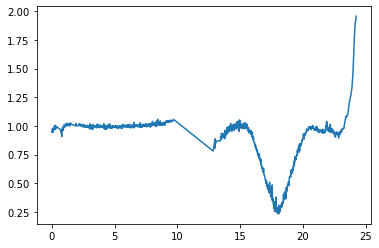

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9150317526834927
1.2216878364870323 -0.22168783648703216


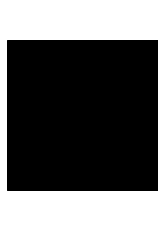

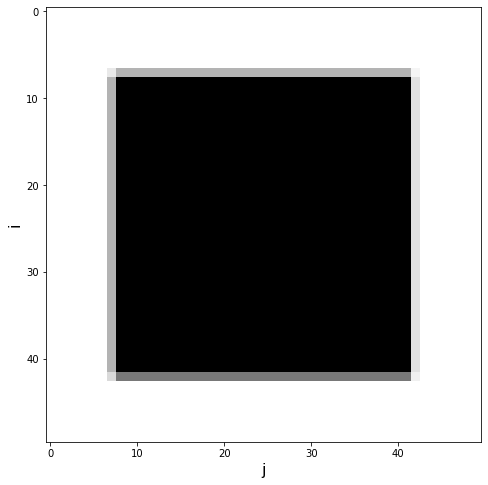

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


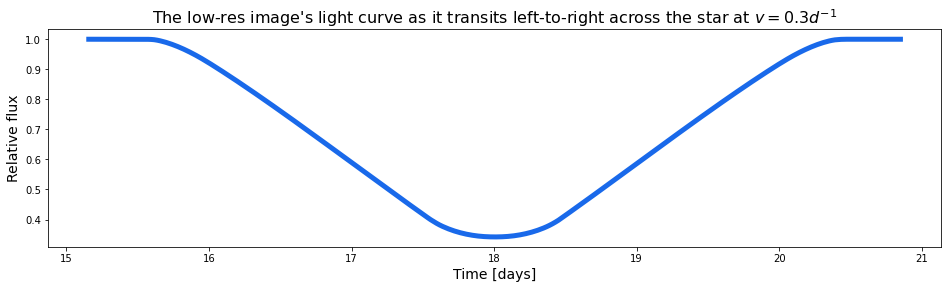

min: 0.34211958763045636


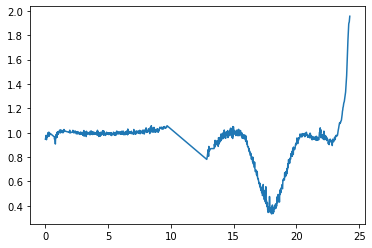

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.8270812575129459
1.3006407690254358 -0.3006407690254357


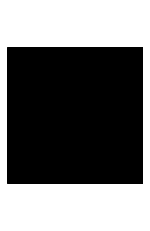

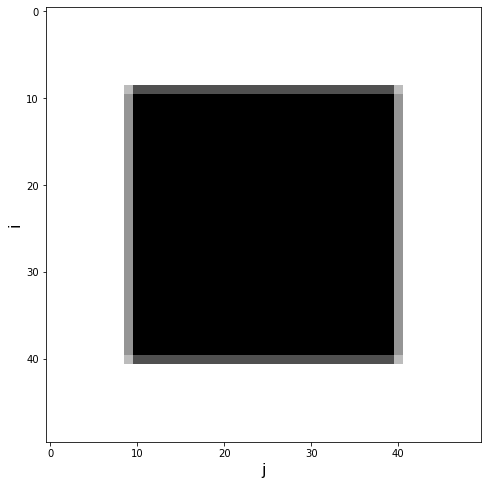

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


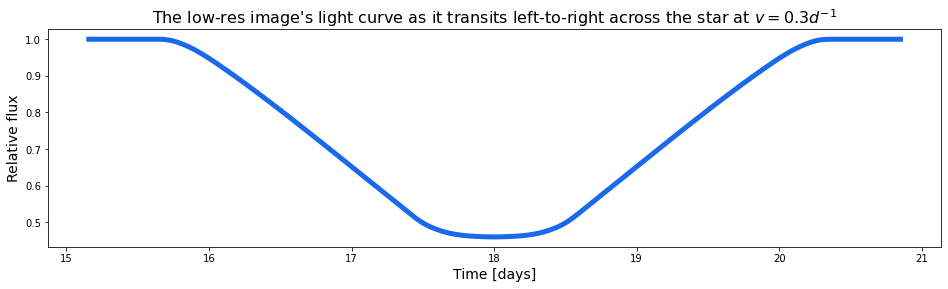

min: 0.45971609634281463


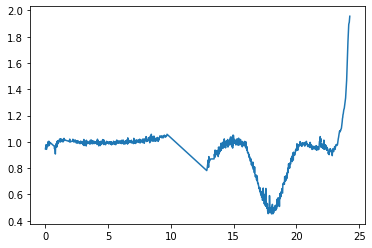

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.6971722542006591
1.4128709291752768 -0.4128709291752768


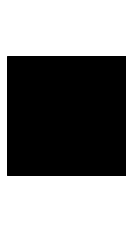

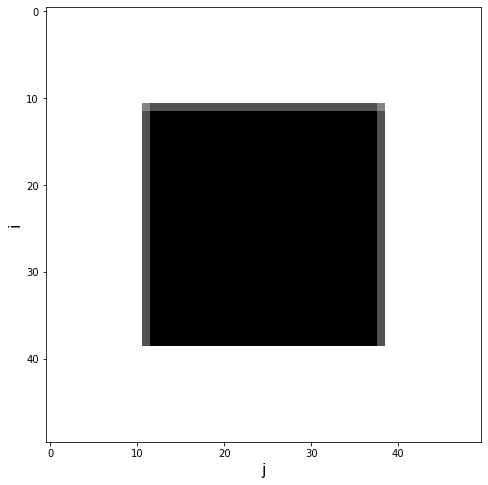

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


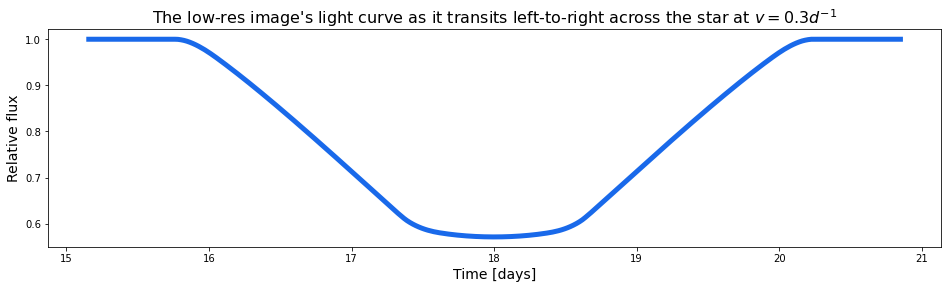

min: 0.5714349539612926


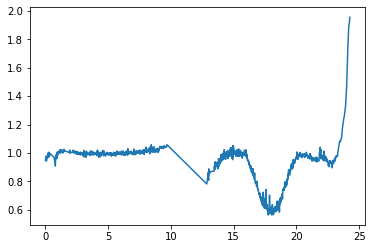

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.5155594916085874
1.591089451179962 -0.591089451179962


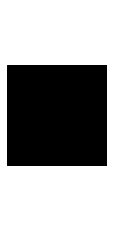

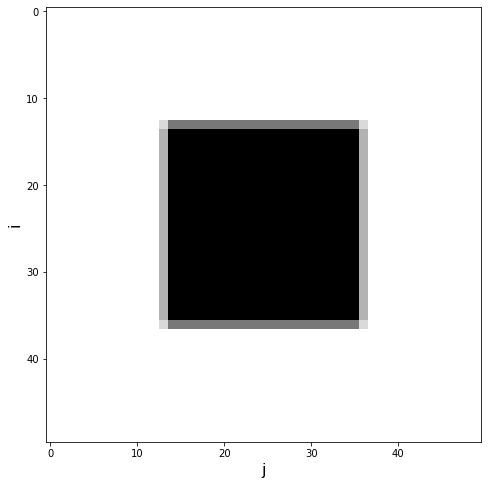

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


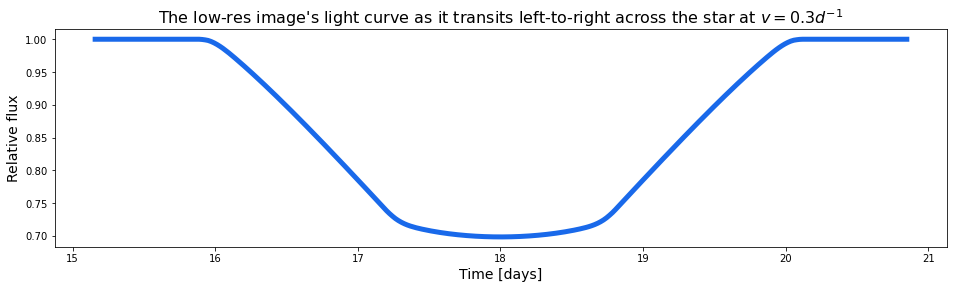

min: 0.698395548599662


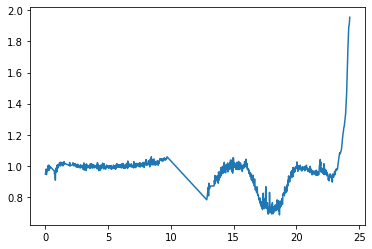

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.21322759607022723
1.9433756729740643 -0.9433756729740643


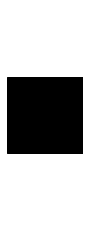

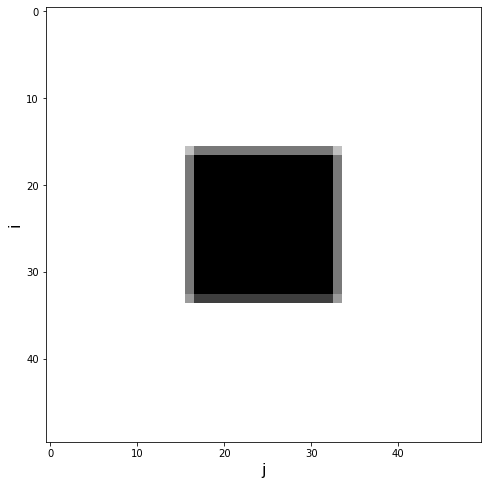

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


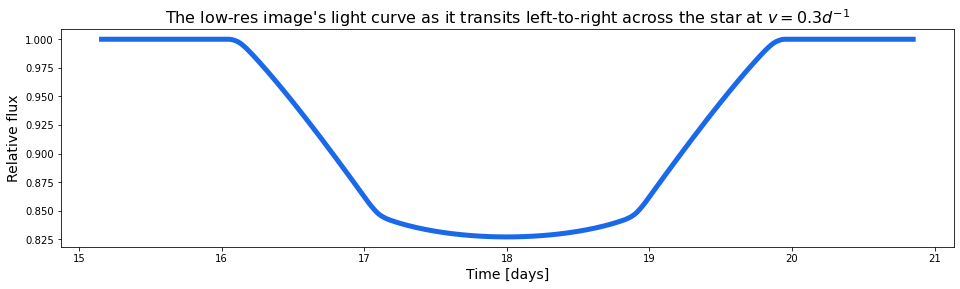

min: 0.8270022865814823


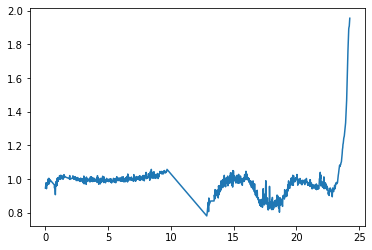

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.21503090183825047
3.3867513459481273 -2.3867513459481273


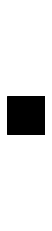

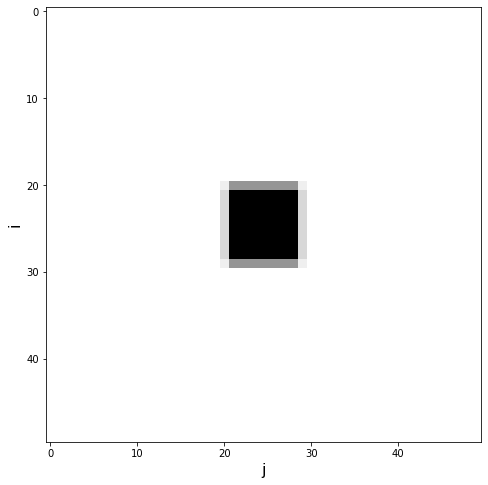

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


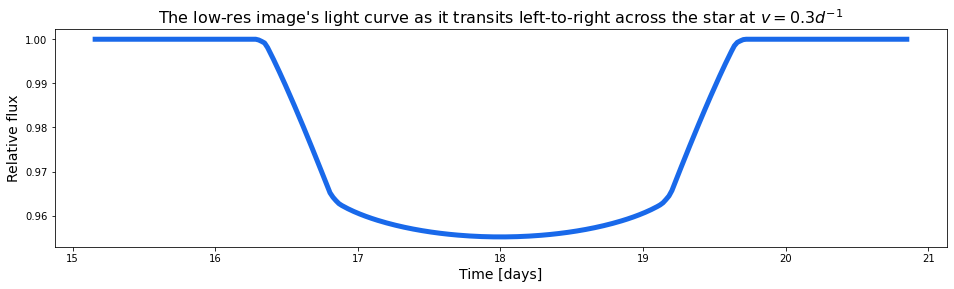

min: 0.9551854202792186


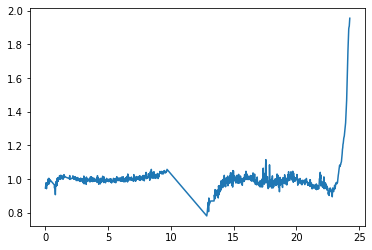

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5464770034174413
5.499999999999997 -4.499999999999997


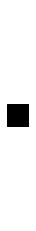

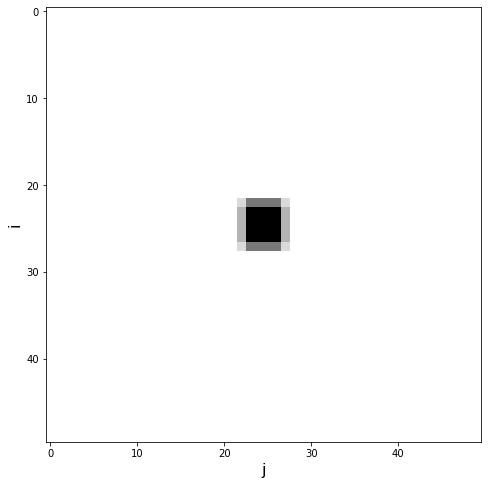

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


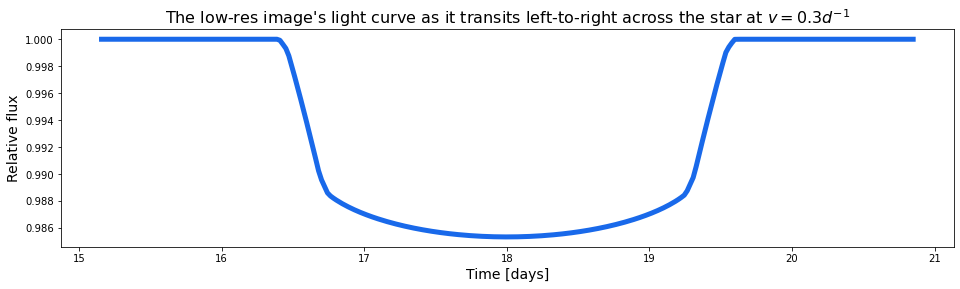

min: 0.9853297036622899


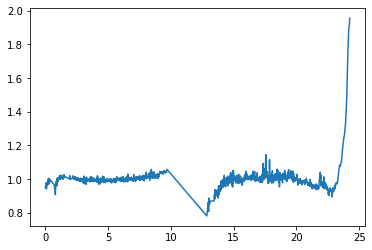

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.53090917764587
1.0184758473652127 -0.018475847365212683


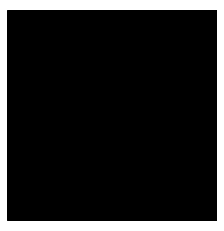

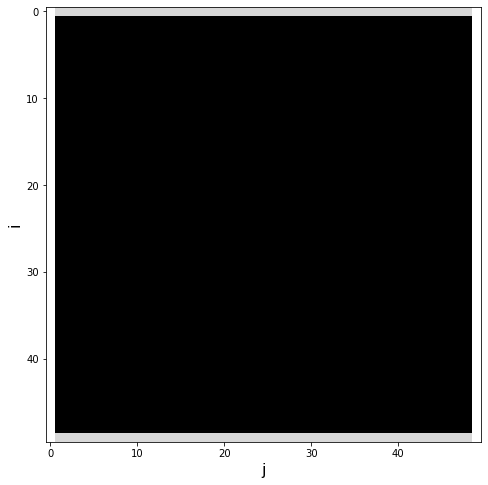

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


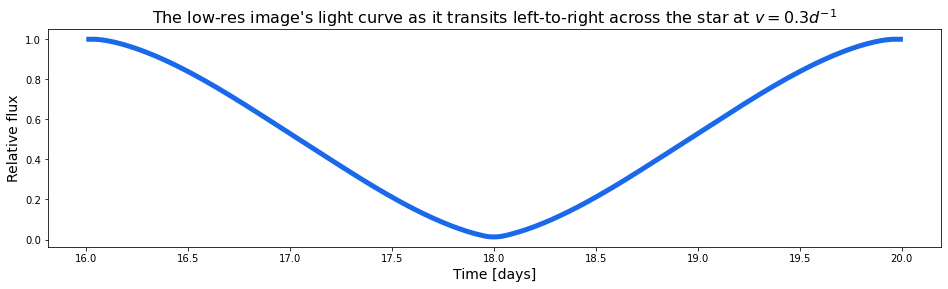

min: 0.012998100127218248


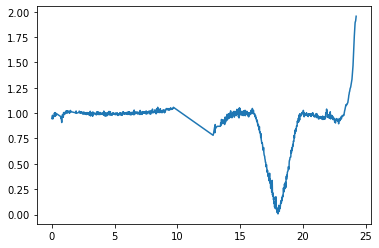

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
1.0627370321263607
1.045544725589981 -0.045544725589980906


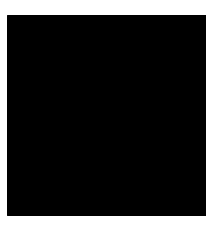

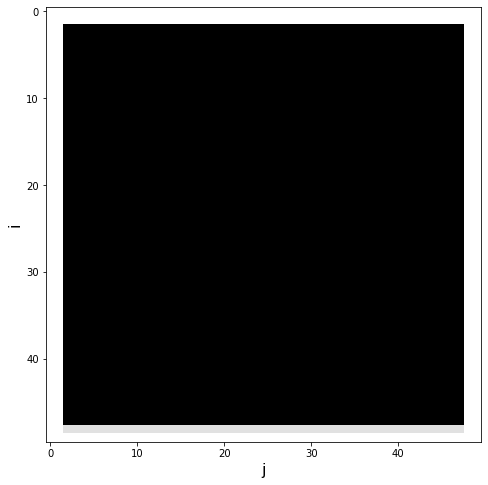

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


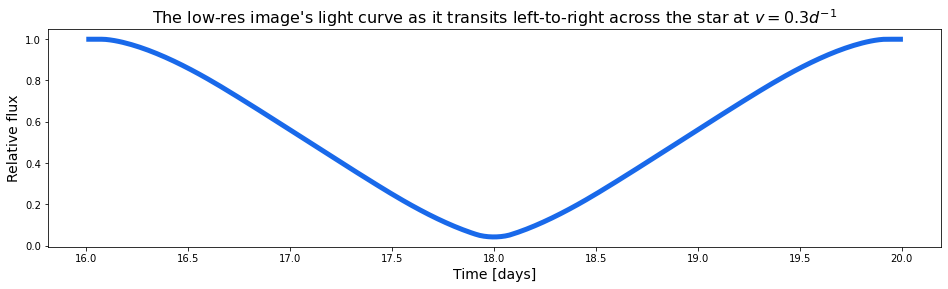

min: 0.041632890660787125


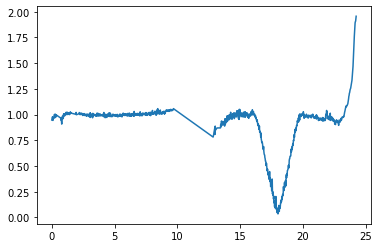

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
1.0361817173183316
1.0773502691896257 -0.07735026918962584


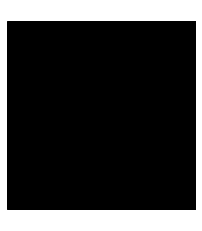

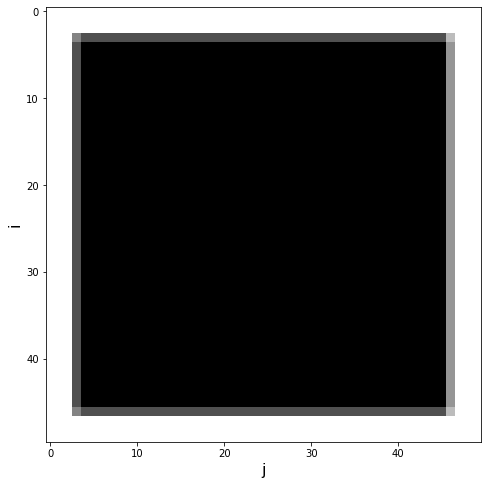

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


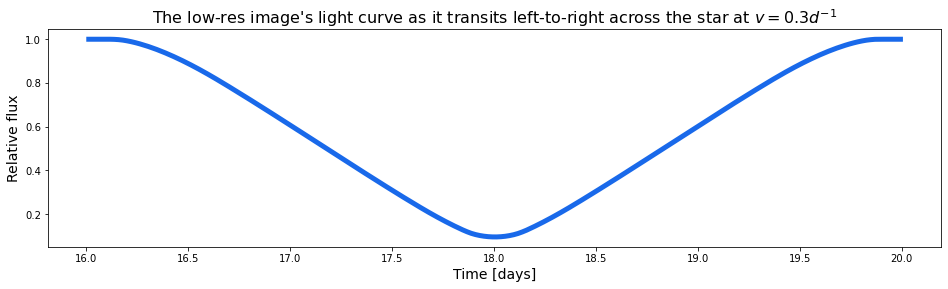

min: 0.09491645914552937


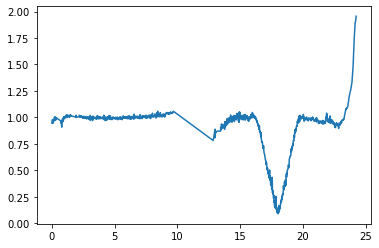

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9911592275425946
1.1154574548966636 -0.1154574548966637


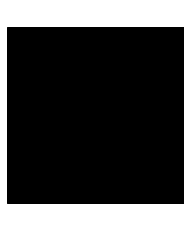

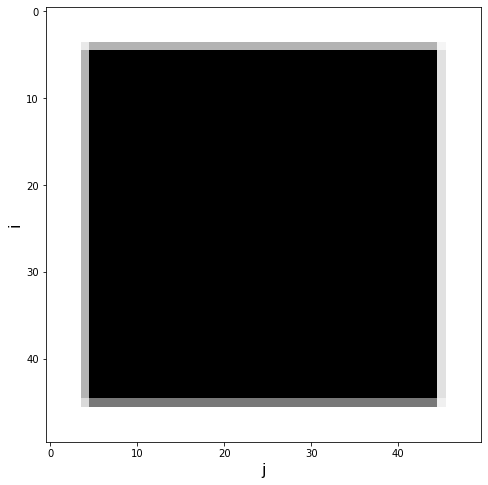

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


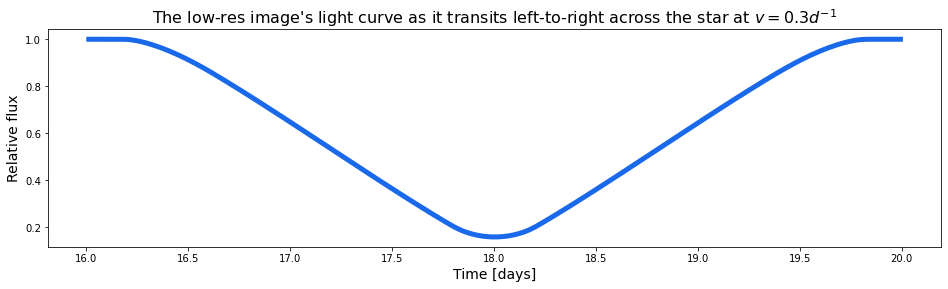

min: 0.1576332806782197


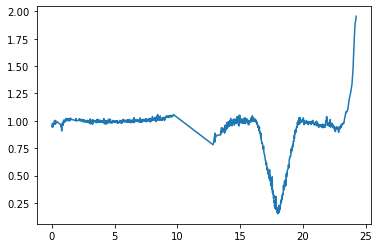

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.9366951149568983
1.162266178532522 -0.1622661785325219


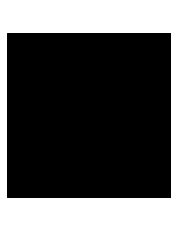

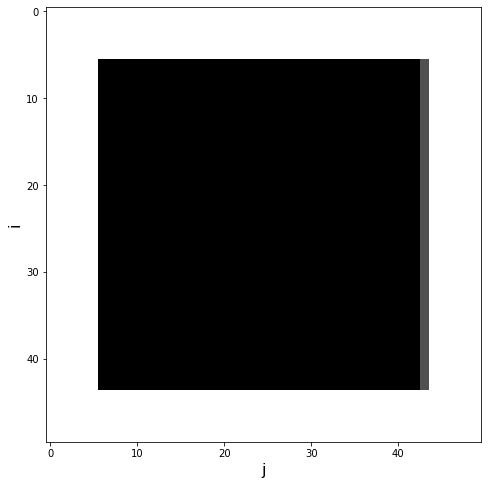

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


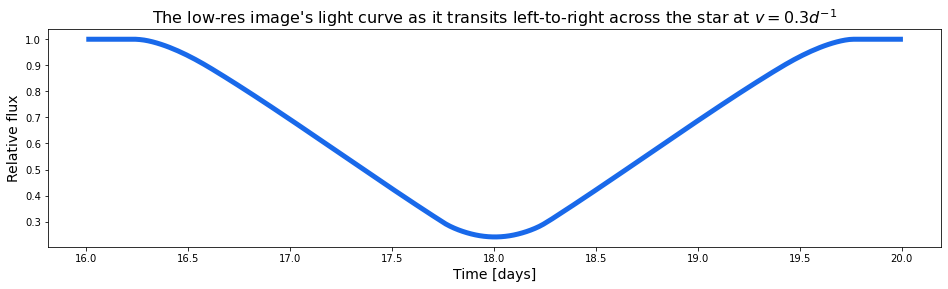

min: 0.24125141734509215


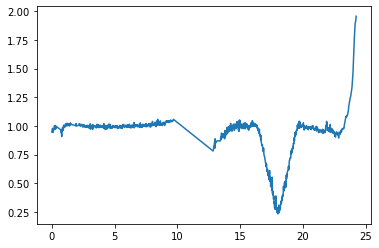

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.859646286143999
1.2216878364870323 -0.22168783648703216


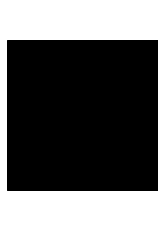

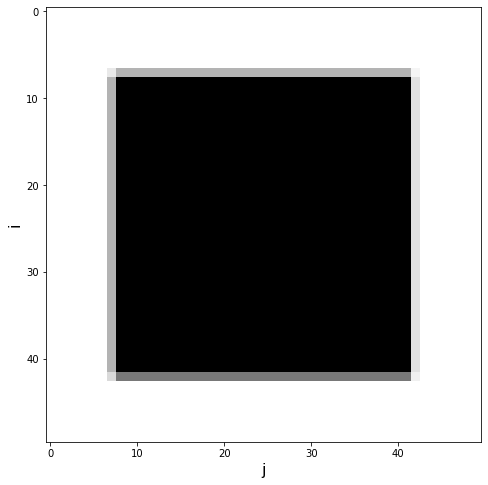

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


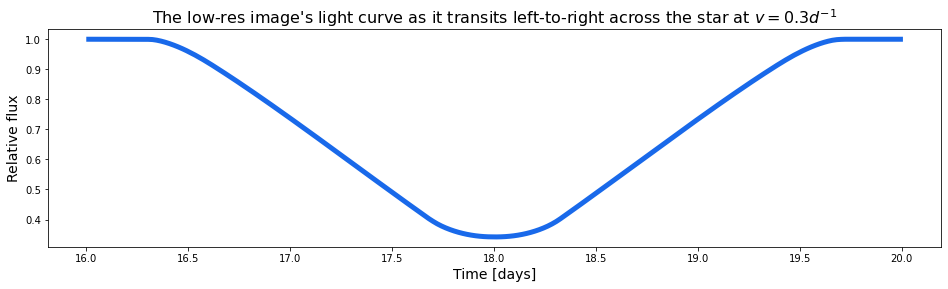

min: 0.3421397625793894


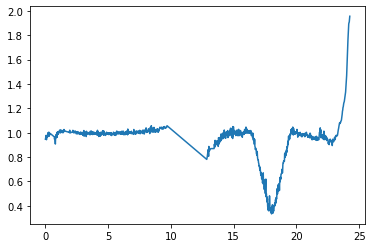

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.7578024597062688
1.3006407690254358 -0.3006407690254357


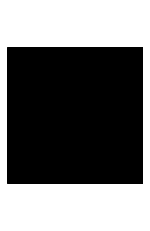

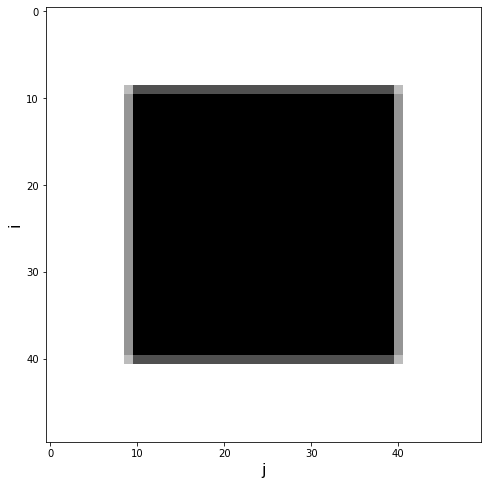

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


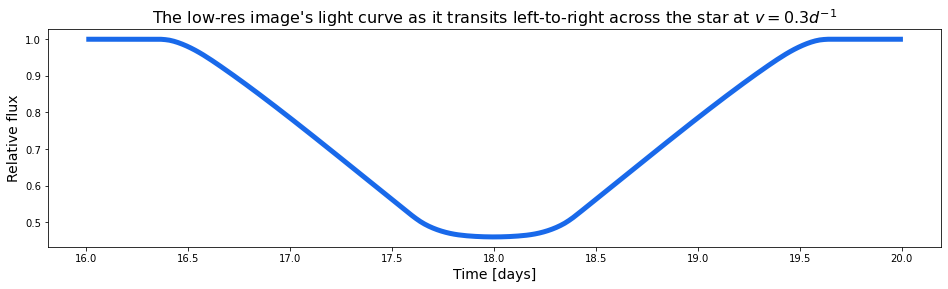

min: 0.45972029981093954


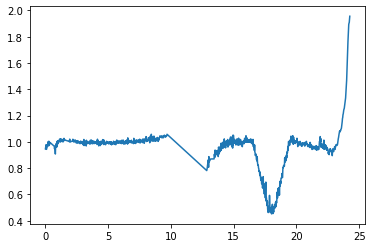

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.610142341635007
1.4128709291752768 -0.4128709291752768


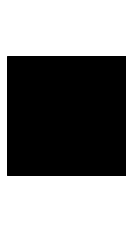

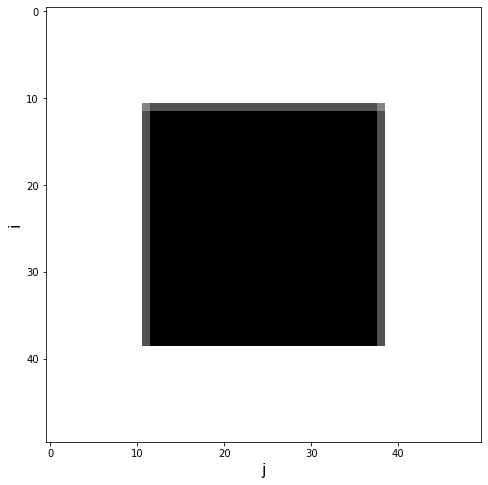

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


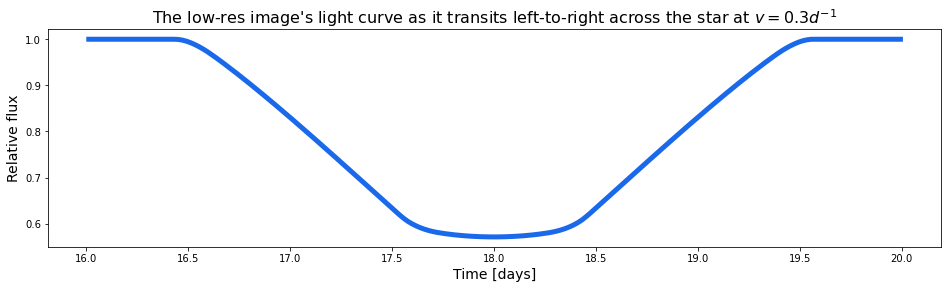

min: 0.5714378532392058


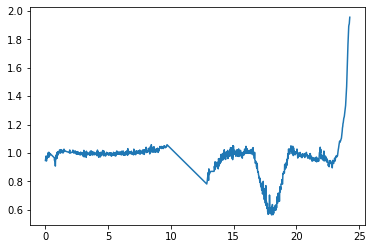

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.42186825575517706
1.591089451179962 -0.591089451179962


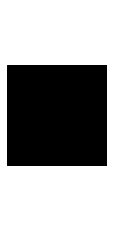

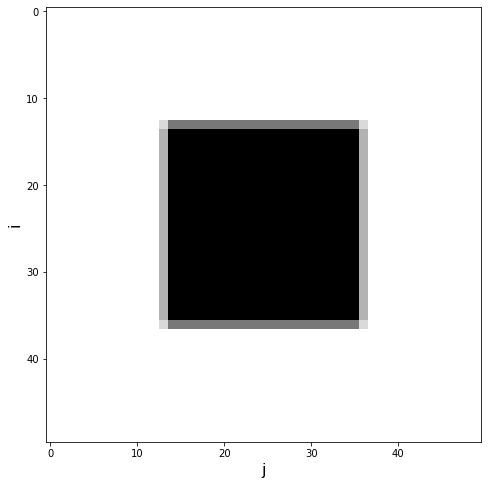

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


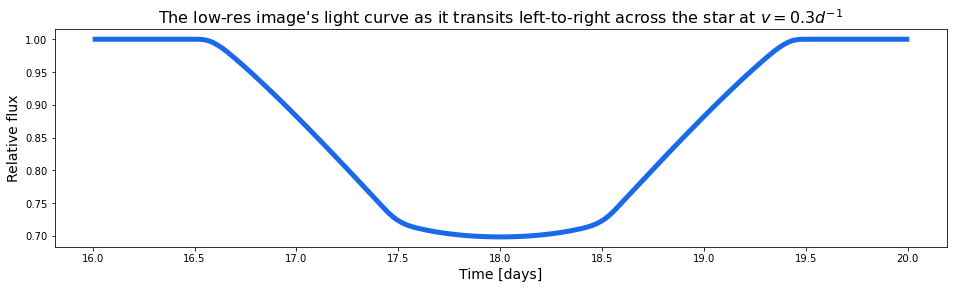

min: 0.6983973625883342


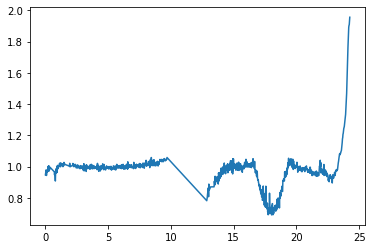

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.12119202681370814
1.9433756729740643 -0.9433756729740643


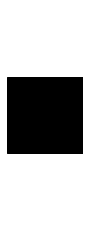

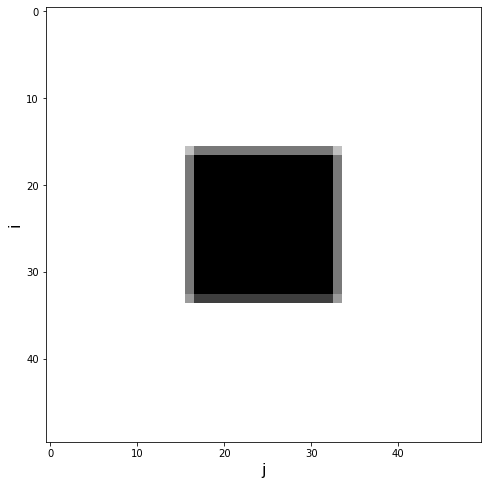

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


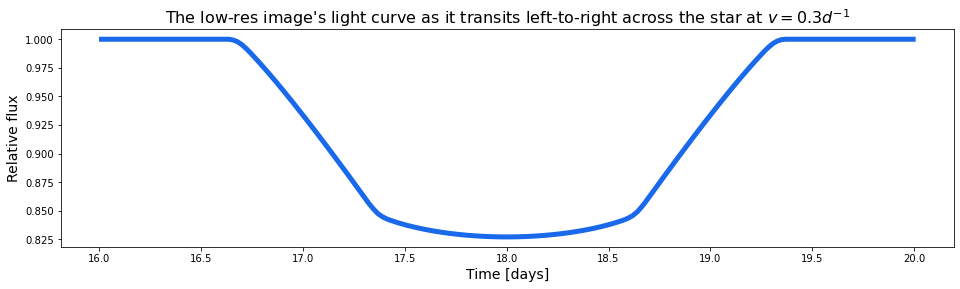

min: 0.8270032333886979


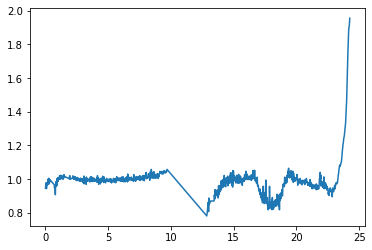

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.2658988578477974
3.3867513459481273 -2.3867513459481273


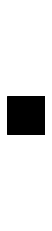

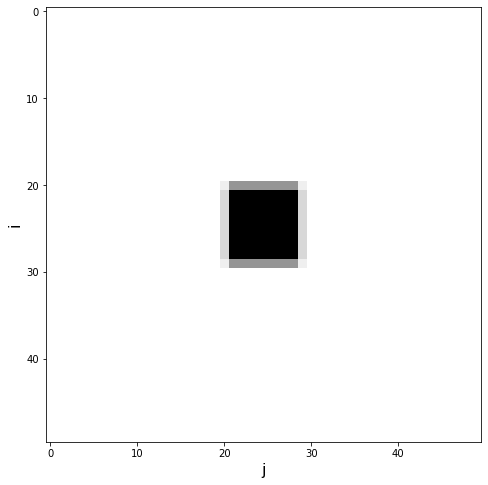

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


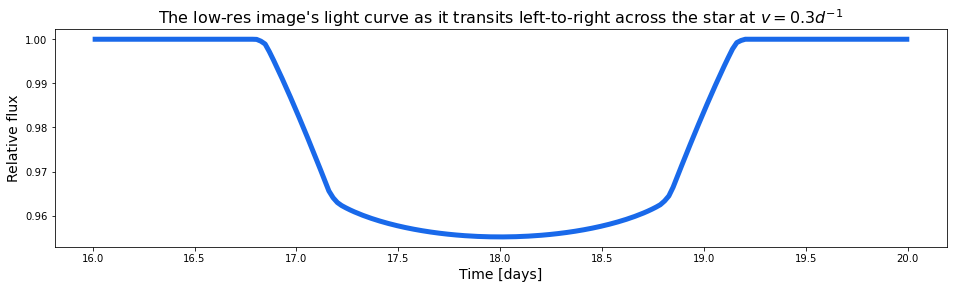

min: 0.9551856467787367


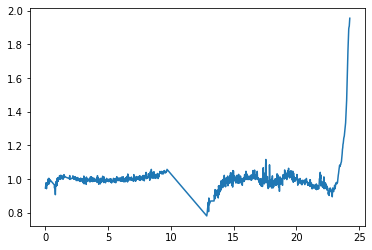

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5280161507473522
5.499999999999997 -4.499999999999997


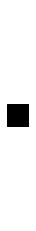

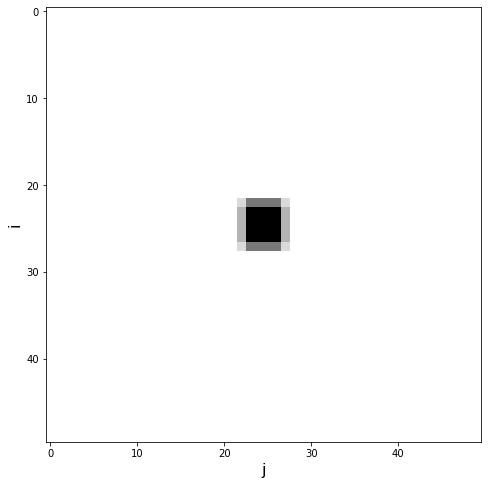

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


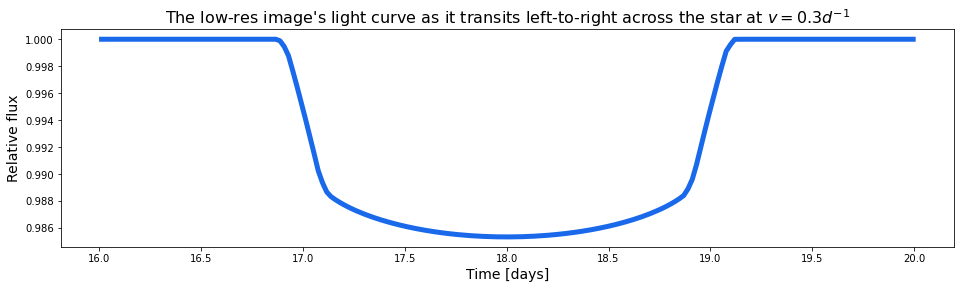

min: 0.9853297765899384


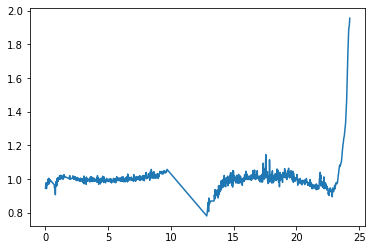

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5282125637441056
1.0184758473652127 -0.018475847365212683


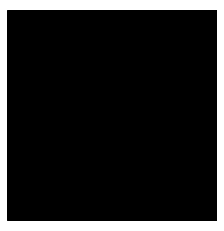

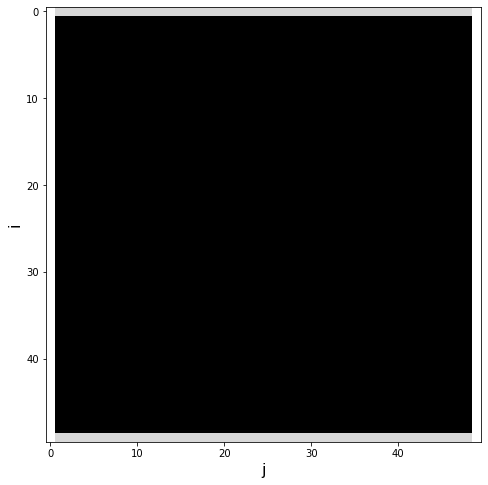

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


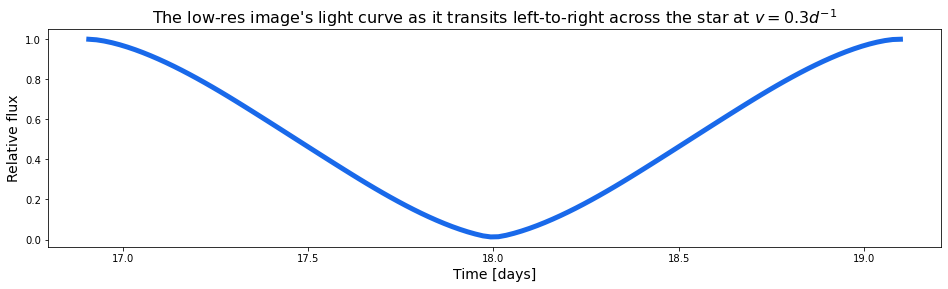

min: 0.013178688021254326


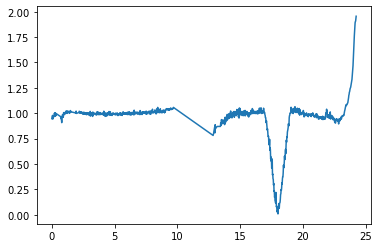

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.7820546135402903
1.045544725589981 -0.045544725589980906


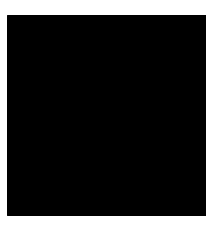

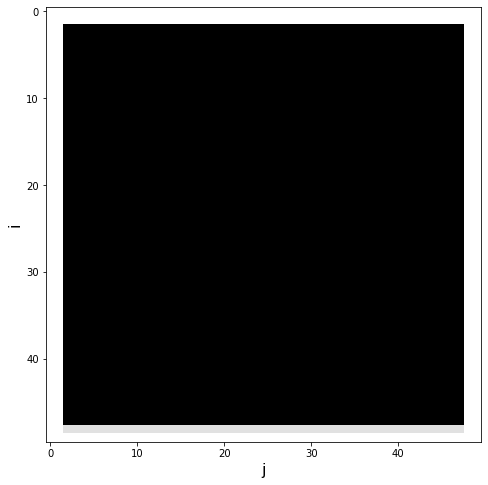

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


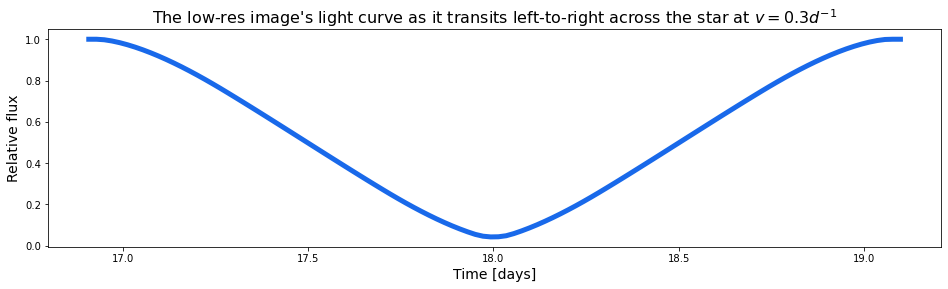

min: 0.04176312422673667


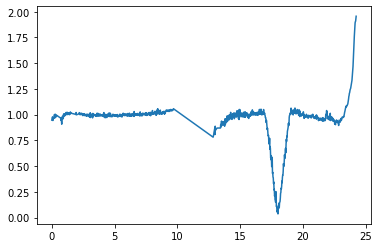

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.7427696987356979
1.0773502691896257 -0.07735026918962584


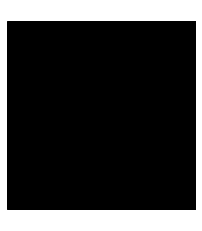

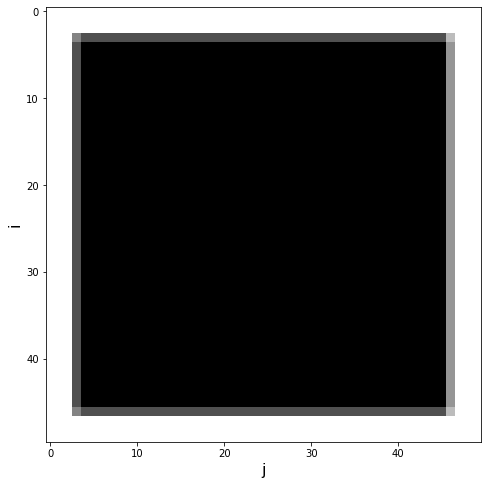

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


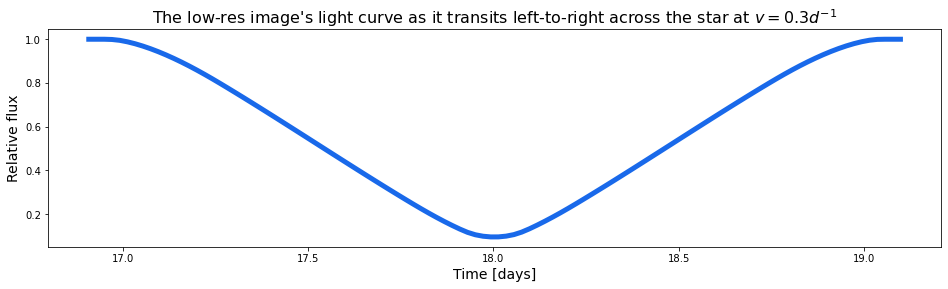

min: 0.09516310109277804


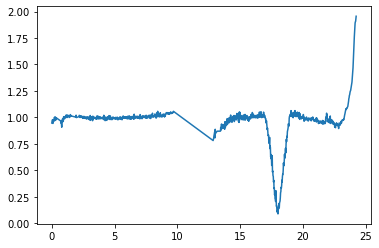

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.6826334891826243
1.1154574548966636 -0.1154574548966637


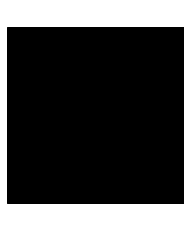

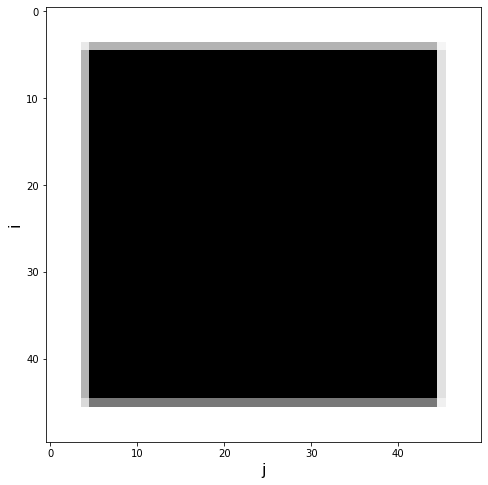

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


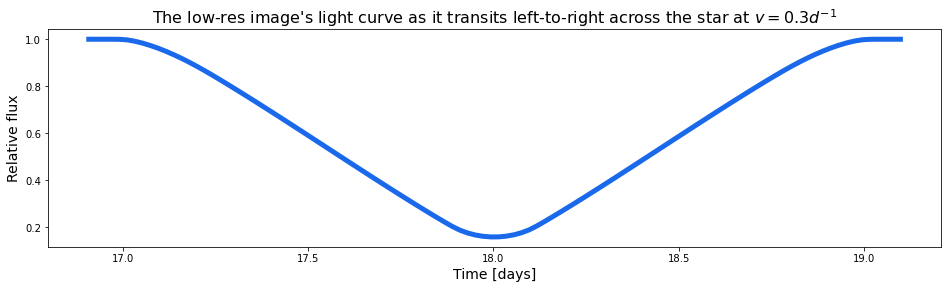

min: 0.15780715596703487


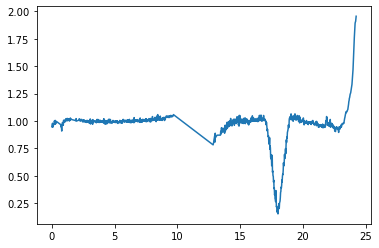

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.61827382386125
1.162266178532522 -0.1622661785325219


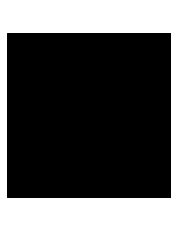

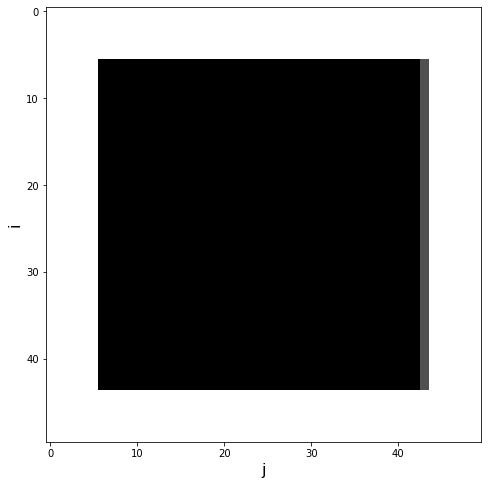

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


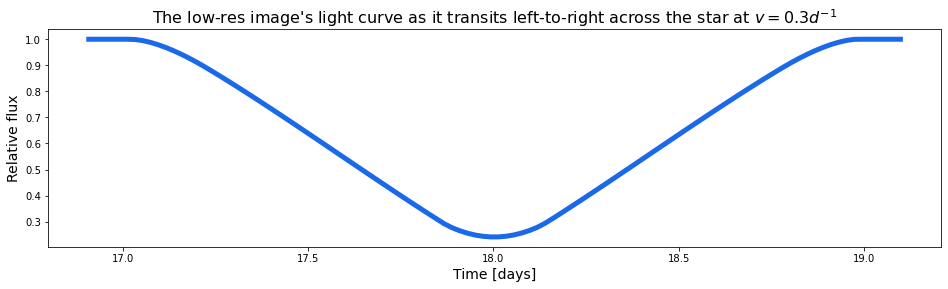

min: 0.24143450681729206


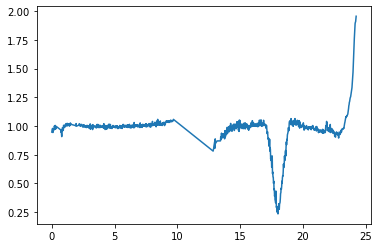

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.534774773355556
1.2216878364870323 -0.22168783648703216


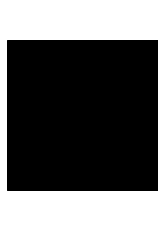

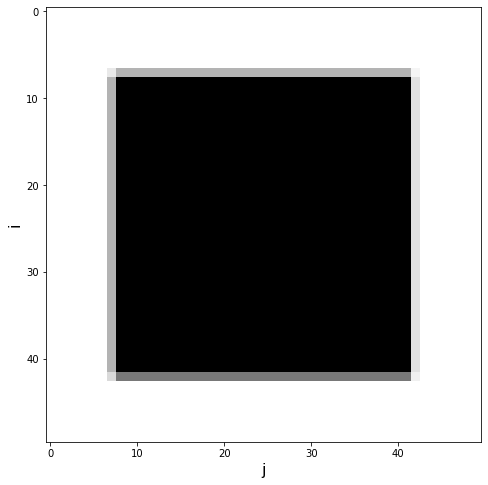

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


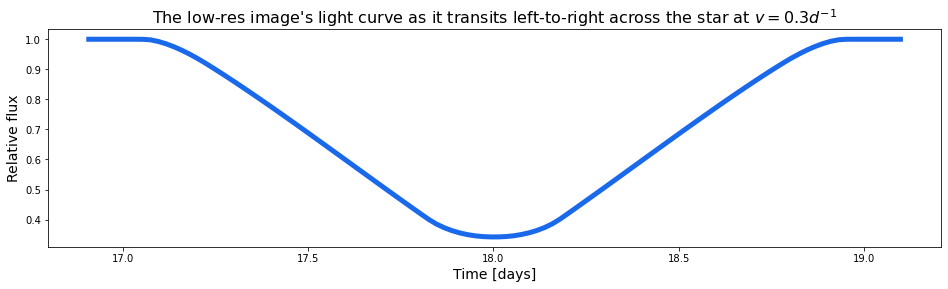

min: 0.34221734462225795


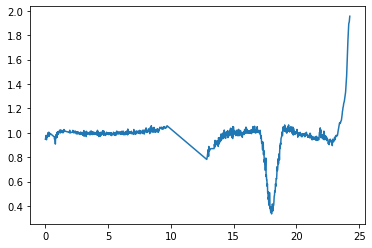

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.4306610388121159
1.3006407690254358 -0.3006407690254357


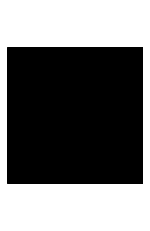

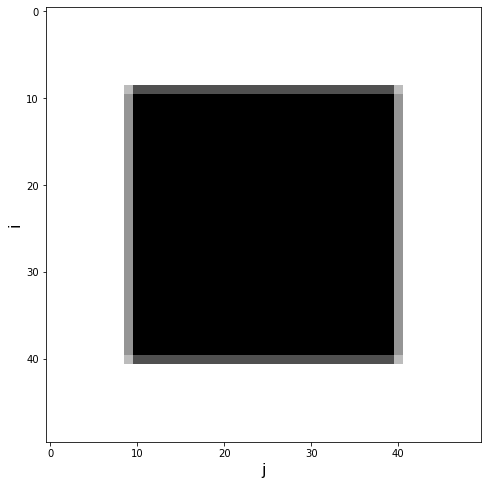

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


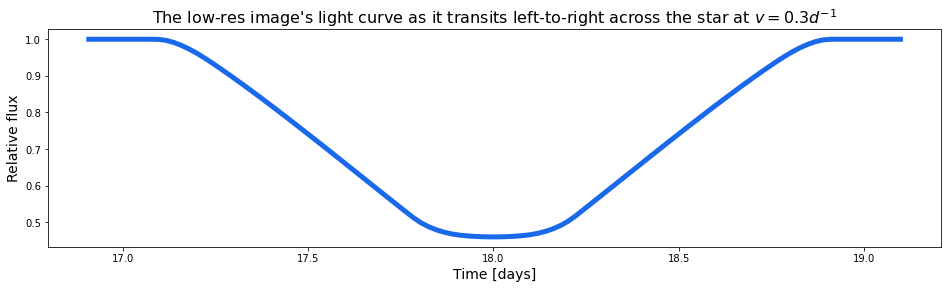

min: 0.4597387649446908


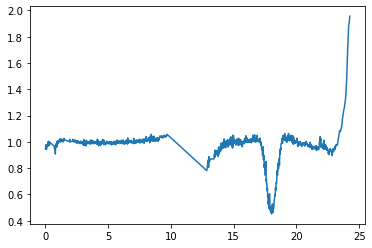

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.29573791754570616
1.4128709291752768 -0.4128709291752768


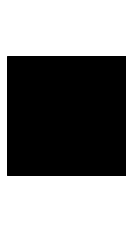

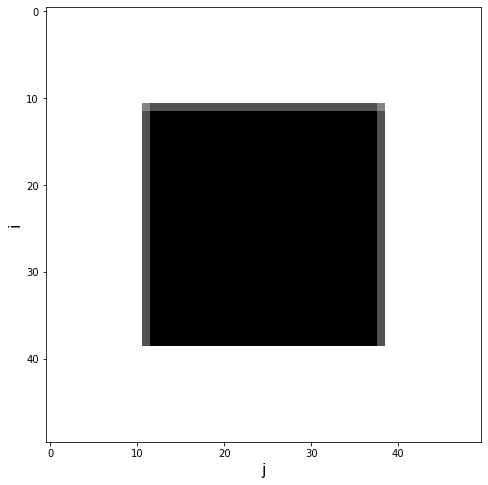

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


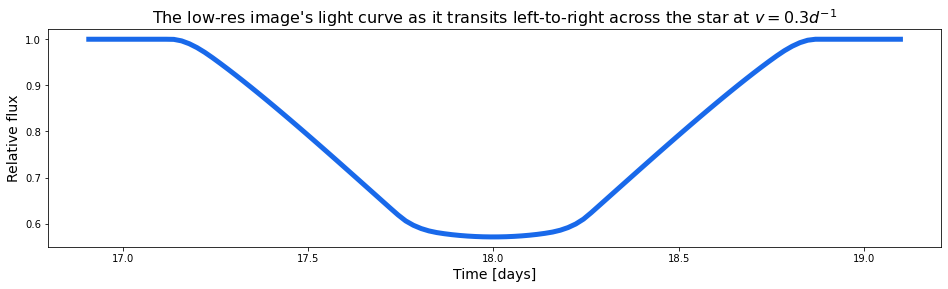

min: 0.5714505883116876


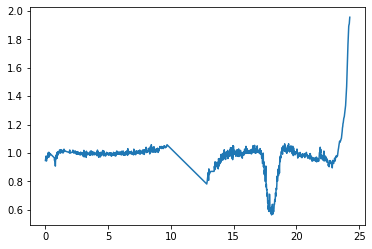

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
0.14044224917260964
1.591089451179962 -0.591089451179962


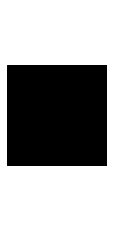

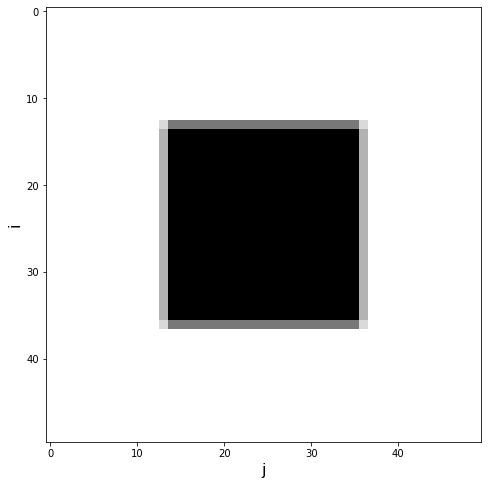

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


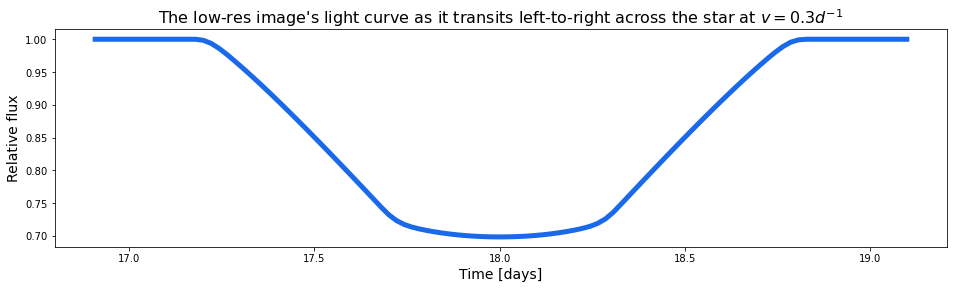

min: 0.698405330224986


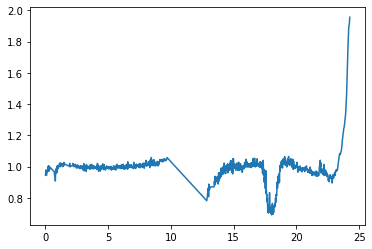

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.07609152829256675
1.9433756729740643 -0.9433756729740643


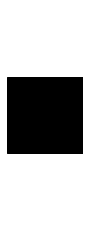

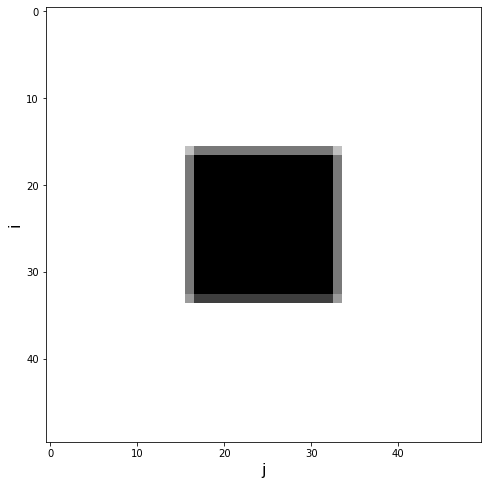

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


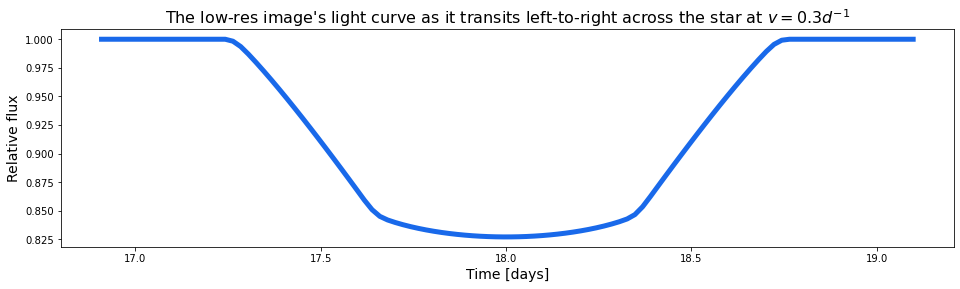

min: 0.8270073919309675


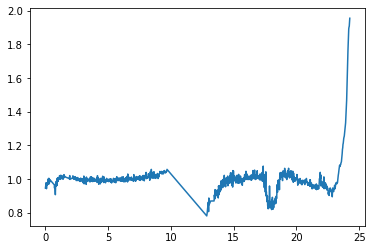

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.332336550469546
3.3867513459481273 -2.3867513459481273


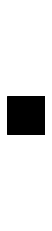

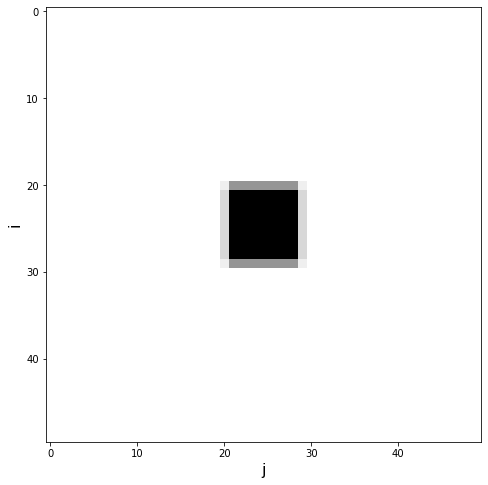

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


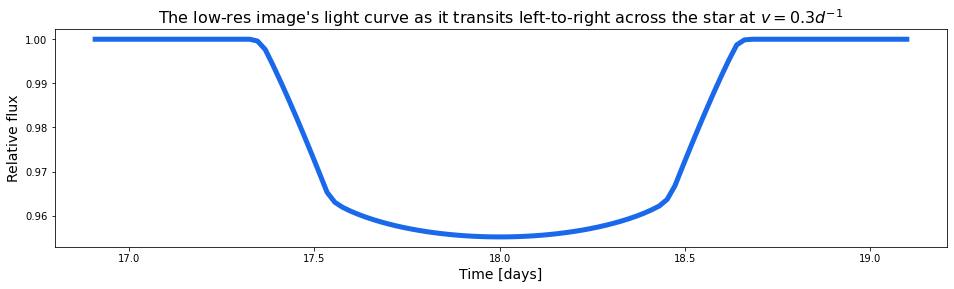

min: 0.9551866414633033


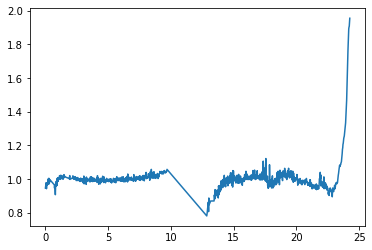

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5314763633685065
5.499999999999997 -4.499999999999997


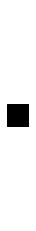

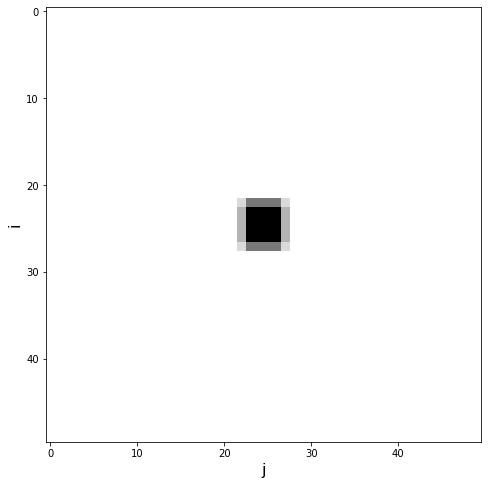

/opt/conda/envs/spocc/lib/python3.6/site-packages/ipykernel_launcher.py:130: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


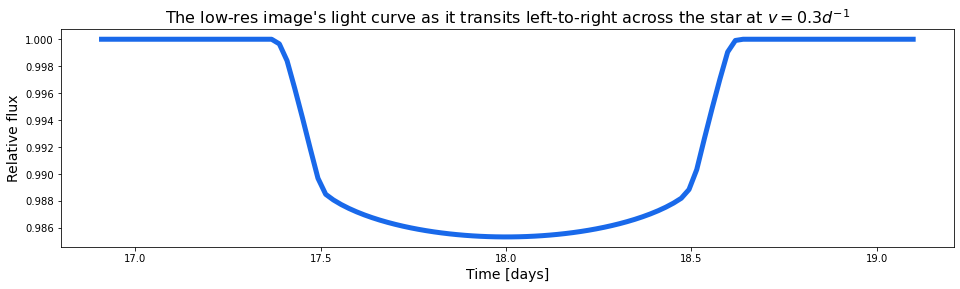

min: 0.9853300967381184


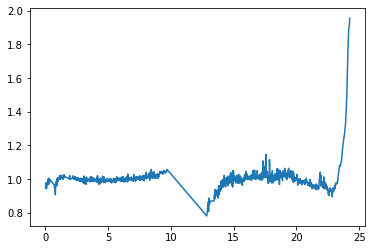

tic 357686299
          Time      Flux  Flux_err
0     0.000000  0.946797  0.005602
1     0.020833  0.961057  0.005608
2     0.041666  0.971273  0.005622
3     0.062499  0.978847  0.005600
4     0.083332  0.942797  0.005621
..         ...       ...       ...
942  24.166355  1.891664  0.010542
943  24.187188  1.902852  0.010689
944  24.208021  1.908414  0.010823
945  24.228854  1.930770  0.010962
946  24.249687  1.955682  0.011101

[947 rows x 3 columns]
-0.5303474581170129


In [147]:
shape = "Square"
tic_id = 357686299



depths = np.array([0.07, 0.16, 0.25, 0.34, 0.43, 0.52, 0.61, 0.70, 0.79, 0.88, 0.97, .99])
depths = 1/ np.sqrt(1- depths)
widths = np.array([.3, .4 , .5, .7, 1.0, 1.8])
t_ref = 18


results_widths = np.array([])
results_depths = np.array([])
results_mstats = np.array([])
results_rankings = np.array([])

for w in widths:
    for d in depths:
        make_shape(d, w, shape, t_ref)
        make_lc(shape, d, w, index, t_ref)
        mstat = calc_mstat(shape, d, w, t_ref)
        #get width
        #get depth
        #get ranking
        print(mstat)
        function()
        
        results_widths = np.append(results_widths, w)
        results_depths = np.append(results_depths, d)
        results_mstats = np.append(results_mstats, mstat)


    Velocities (corr. to width)  Img Ratio (corr. to depth)    Mstats  \
0                           0.3                    1.036952  0.649573   
1                           0.3                    1.091089  0.678792   
2                           0.3                    1.154701  0.702657   
3                           0.3                    1.230915  0.719922   
4                           0.3                    1.324532  0.696504   
..                          ...                         ...       ...   
67                          1.8                    1.825742  0.140442   
68                          1.8                    2.182179 -0.076092   
69                          1.8                    2.886751 -0.332337   
70                          1.8                    5.773503 -0.531476   
71                          1.8                   10.000000 -0.530347   

    Detected  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
67         0  
68 

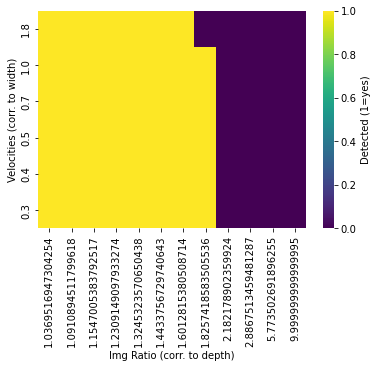

In [157]:
import seaborn as sns

data = pd.DataFrame({'Velocities (corr. to width)': results_widths, 'Img Ratio (corr. to depth)': results_depths, 'Mstats': results_mstats})
data["Detected"] = (data["Mstats"] > 0.25).astype(int)

print(data)
data_pivoted = data.pivot("Velocities (corr. to width)", "Img Ratio (corr. to depth)", "Detected")

data_pivoted = sns.heatmap(data_pivoted, cmap="viridis")
#pd.plot(kind='RonR',rot=0)

#plt.title(str(noise) + " noise transit detection rate")
data_pivoted.collections[0].colorbar.set_label("Detected (1=yes)")
data_pivoted.invert_yaxis()
plt.show()

#data.to_csv('./heatmap_data/' +noise[:-4].replace(" ", "_") + '_heatmap.csv', index=False)